# Reto Kaggle - Titanic classification

**Team's name:** *AI's Daemons*\
**Team's members:**
- Cristobal Eleazar Meza (A01661792)
- Ricardo Campos Luna (A01656898)
- Diego Esteban Zepeda Ceballos (A01026512)

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark = SparkSession \
       .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [998 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,149 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,571 kB]
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [

### Step 1: Check the data

In [ ]:
# Import libraries
import pandas as pd # table manipulation
import numpy as np # math, arrays
import matplotlib.pyplot as plt # plot
import seaborn as sns # visualization
import warnings # maybe warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from numpy import asarray
import plotly.express as px

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

from sklearn.model_selection import train_test_split
%pip install tensorflow


In [ ]:
# Import SparkSession and other necessary modules
from pyspark.sql import SparkSession

# Create or retrieve the SparkSession
spark = SparkSession.builder \
    .appName("Titanic_Spark") \
    .getOrCreate()

# Path to your CSV file. If you uploaded it using files.upload(), it will be in the root directory.
csv_train_file_path = 'https://github.com/AntonioLaurance/Titanic_Survival_Predictor/blob/main/Datasets/train.csv'
csv_test_file_path = 'https://github.com/AntonioLaurance/Titanic_Survival_Predictor/blob/main/Datasets/test.csv'

# Read CSV into a DataFrame
train_titanic = spark.read.csv(csv_train_file_path, header = True, inferSchema = True)
test_titanic = spark.read.csv(csv_test_file_path, header = True, inferSchema = True)

# Show the first few rows of the main DataFrame
train_titanic.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

**Challenge**: Titanic Dataset


**Objective**: Check Reasons for survival, predict who is more likely to survive within the Titanic Conditions or features available

**Hypothesis:** Being Women or Children should be the main cause of survival since news, reports and common knowledge said that they were prioritized when boarding lifeboats.

In [ ]:
# Data Dictionary

print("""
-------------------------------------------------------------------------------------------
Variable	     Definition	                                        Key
-------------------------------------------------------------------------------------------
survival             Survival	                                        0 = No, 1 = Yes
pclass	             Ticket class	                                1 = 1st, 2 = 2nd, 3 = 3rd
sex	             Sex
age	             Age in years
sibsp	             # of siblings / spouses aboard the Titanic
parch	             # of parents / children aboard the Titanic
ticket	             Ticket number
fare	             Passenger fare
cabin	             Cabin number
embarked	     Port of Embarkation	                        C = Cherbourg, Q = Queenstown, S = Southampton
""")



-------------------------------------------------------------------------------------------
Variable	     Definition	                                        Key
-------------------------------------------------------------------------------------------
survival             Survival	                                        0 = No, 1 = Yes
pclass	             Ticket class	                                1 = 1st, 2 = 2nd, 3 = 3rd
sex	             Sex
age	             Age in years
sibsp	             # of siblings / spouses aboard the Titanic
parch	             # of parents / children aboard the Titanic
ticket	             Ticket number
fare	             Passenger fare
cabin	             Cabin number
embarked	     Port of Embarkation	                        C = Cherbourg, Q = Queenstown, S = Southampton



In [ ]:
# head data overview
train_titanic.head(10)

[Row(PassengerId=1, Survived=0, Pclass=3, Name='Braund, Mr. Owen Harris', Sex='male', Age=22.0, SibSp=1, Parch=0, Ticket='A/5 21171', Fare=7.25, Cabin=None, Embarked='S'),
 Row(PassengerId=2, Survived=1, Pclass=1, Name='Cumings, Mrs. John Bradley (Florence Briggs Thayer)', Sex='female', Age=38.0, SibSp=1, Parch=0, Ticket='PC 17599', Fare=71.2833, Cabin='C85', Embarked='C'),
 Row(PassengerId=3, Survived=1, Pclass=3, Name='Heikkinen, Miss. Laina', Sex='female', Age=26.0, SibSp=0, Parch=0, Ticket='STON/O2. 3101282', Fare=7.925, Cabin=None, Embarked='S'),
 Row(PassengerId=4, Survived=1, Pclass=1, Name='Futrelle, Mrs. Jacques Heath (Lily May Peel)', Sex='female', Age=35.0, SibSp=1, Parch=0, Ticket='113803', Fare=53.1, Cabin='C123', Embarked='S'),
 Row(PassengerId=5, Survived=0, Pclass=3, Name='Allen, Mr. William Henry', Sex='male', Age=35.0, SibSp=0, Parch=0, Ticket='373450', Fare=8.05, Cabin=None, Embarked='S'),
 Row(PassengerId=6, Survived=0, Pclass=3, Name='Moran, Mr. James', Sex='male',

In [ ]:
# Check the number of distinct values in the 'Sex' column
num_distinct_sex = train_titanic.select('Sex').distinct().count()
print(f"Number of distinct values in 'Sex': {num_distinct_sex}")

train_titanic

Number of distinct values in 'Sex': 2


DataFrame[PassengerId: int, Survived: int, Pclass: int, Name: string, Sex: string, Age: double, SibSp: int, Parch: int, Ticket: string, Fare: double, Cabin: string, Embarked: string]

In [ ]:
# Get and display unique values in the 'Embarked' column
unique_emb_values = train_titanic.select('Embarked').distinct().collect()
print(f"Unique values in 'embarked': {unique_emb_values}")

# Get and display the number of distinct values
num_distinct_emb = len(unique_emb_values)
print(f"Number of distinct values in 'Embarked': {num_distinct_emb}")

# 3 embarking ports

Unique values in 'embarked': [Row(Embarked='Q'), Row(Embarked='C'), Row(Embarked='S'), Row(Embarked=None)]
Number of distinct values in 'Embarked': 4


In [ ]:
# Get and display unique values in the 'SibSp' column
unique_emb_values = train_titanic.select('SibSp').distinct().collect()
print(f"Unique values in 'SibSp': {unique_emb_values}")

# Get and display the number of distinct values
num_distinct_emb = len(unique_emb_values)
print(f"Number of distinct values in 'SibSp': {num_distinct_emb}")

# One can have from 0 to up to 8 Siblings and/or Spouse

Unique values in 'SibSp': [Row(SibSp=1), Row(SibSp=3), Row(SibSp=5), Row(SibSp=4), Row(SibSp=8), Row(SibSp=2), Row(SibSp=0)]
Number of distinct values in 'SibSp': 7


In [ ]:
# Get and display unique values in the 'Parch' column
unique_emb_values = train_titanic.select('Parch').distinct().collect()
print(f"Unique values in 'Parch': {unique_emb_values}")

# Get and display the number of distinct values
num_distinct_emb = len(unique_emb_values)
print(f"Number of distinct values in 'Parch': {num_distinct_emb}")

# One can have from 0 to up to 6 Parents and/or Siblings

Unique values in 'Parch': [Row(Parch=1), Row(Parch=6), Row(Parch=3), Row(Parch=5), Row(Parch=4), Row(Parch=2), Row(Parch=0)]
Number of distinct values in 'Parch': 7


In [ ]:
#tail of data overview
train_titanic.tail(10)

[Row(PassengerId=882, Survived=0, Pclass=3, Name='Markun, Mr. Johann', Sex='male', Age=33.0, SibSp=0, Parch=0, Ticket='349257', Fare=7.8958, Cabin=None, Embarked='S'),
 Row(PassengerId=883, Survived=0, Pclass=3, Name='Dahlberg, Miss. Gerda Ulrika', Sex='female', Age=22.0, SibSp=0, Parch=0, Ticket='7552', Fare=10.5167, Cabin=None, Embarked='S'),
 Row(PassengerId=884, Survived=0, Pclass=2, Name='Banfield, Mr. Frederick James', Sex='male', Age=28.0, SibSp=0, Parch=0, Ticket='C.A./SOTON 34068', Fare=10.5, Cabin=None, Embarked='S'),
 Row(PassengerId=885, Survived=0, Pclass=3, Name='Sutehall, Mr. Henry Jr', Sex='male', Age=25.0, SibSp=0, Parch=0, Ticket='SOTON/OQ 392076', Fare=7.05, Cabin=None, Embarked='S'),
 Row(PassengerId=886, Survived=0, Pclass=3, Name='Rice, Mrs. William (Margaret Norton)', Sex='female', Age=39.0, SibSp=0, Parch=5, Ticket='382652', Fare=29.125, Cabin=None, Embarked='Q'),
 Row(PassengerId=887, Survived=0, Pclass=2, Name='Montvila, Rev. Juozas', Sex='male', Age=27.0, Sib

In [ ]:
# Remarks on the observed columns
# PassengerId - Might not add much, just number
# Survived - Label (Most important)
# Pclass - Good to have, doesnt present issues
# Name - Not useful, strings
# Sex - Useful but will be transformed to number
# Age - Useful but might require Imputation, Deletion or somehting else due to NaN
# SibSp - Might give importance of relationship but will have to see later
# Parch - Might give importance of relationship but will have to see later
# Ticket - Seems a little bit weird, doesnt seem to add much
# Fare - Might be related to class, might not be useful (might repeat pattern)
# Cabin - Lots of NaN, doesnt seem useful, might delete
# Embarked - Might not be useful, after all everyone was at the middle of the ocean

In [ ]:
# Dimension overview
# (count of total instances and features)
# N=Instances
# M=Features
N, M = train_titanic.count(), len(train_titanic.columns)
print('Instance count: ', N)
print('Features count: ', M)


Instance count:  891
Features count:  12


Cleaning

In [ ]:
# Check for all NULL values
print("NULL values for each feature\n")

for feature in train_titanic.columns:
    null_counts = train_titanic.filter(train_titanic[feature].isNull()).count()
    print(f"{feature}': {null_counts}")

# test_titanic = test_titanic.dropna(subset = 'Age')


# Age have 20% not usable values - might help, but not entirelly, will have to make further segregation
# Cabin has 77% not usable values - will delete column, useless
# Embarked - will delete

NULL values for each feature

PassengerId': 0
Survived': 0
Pclass': 0
Name': 0
Sex': 0
Age': 177
SibSp': 0
Parch': 0
Ticket': 0
Fare': 0
Cabin': 687
Embarked': 2


In [ ]:
print("Train dataset:")
train_titanic = train_titanic.filter(train_titanic['Embarked'].isNotNull())
train_titanic.show()

print("Test dataset:")
test_titanic = test_titanic.filter(test_titanic['Embarked'].isNotNull())
test_titanic.show()


Train dataset:
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|   

In [ ]:
# Count how many survived
survived = train_titanic.filter(train_titanic['Survived'] == 1).count()
no_survived = train_titanic.filter(train_titanic['Survived'] == 0).count()

# Check if N = Total Survived
S1 = survived + no_survived

print(f"No survived: {no_survived}")
print(f"   Survived: {survived}")
print(f"      Count: {S1}")

# Since they are equal
# Conclusion #1:
# All Instances are labeled

No survived: 549
   Survived: 340
      Count: 889


**Data Encoding**

In [ ]:
# Convert Sex and Embarked to numbers
train_titanic = train_titanic.replace(['male', 'female'], ['0', '1'], subset = ['Sex'])
train_titanic = train_titanic.replace(['C', 'Q', 'S'], ['1', '2', '3'], subset = ['Embarked'])
train_titanic.withColumn('Sex', train_titanic['Sex'].cast('int'))
train_titanic.withColumn('Embarked', train_titanic['Embarked'].cast('int'))

train_titanic.show()

test_titanic = test_titanic.replace(['male', 'female'], ['0', '1'], subset = ['Sex'])
test_titanic = test_titanic.replace(['C', 'Q', 'S'], ['1', '2', '3'], subset = ['Embarked'])
test_titanic.withColumn('Sex', test_titanic['Sex'].cast('int'))
test_titanic.withColumn('Embarked', test_titanic['Embarked'].cast('int'))

test_titanic.show()


+-----------+--------+------+--------------------+---+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+---+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  0|22.0|    1|    0|       A/5 21171|   7.25| NULL|       3|
|          2|       1|     1|Cumings, Mrs. Joh...|  1|38.0|    1|    0|        PC 17599|71.2833|  C85|       1|
|          3|       1|     3|Heikkinen, Miss. ...|  1|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       3|
|          4|       1|     1|Futrelle, Mrs. Ja...|  1|35.0|    1|    0|          113803|   53.1| C123|       3|
|          5|       0|     3|Allen, Mr. Willia...|  0|35.0|    0|    0|          373450|   8.05| NULL|       3|
|          6|       0|     3|    Moran, Mr. James|  0|NULL|    0|    0|          330877| 8.4583| NULL|  

In [ ]:
# drop Cabin, Name, Ticket
train_titanic_dropped = train_titanic.drop('Cabin')
train_titanic_dropped = train_titanic_dropped.drop('Name')
train_titanic_dropped = train_titanic_dropped.drop('Ticket')
train_titanic_dropped.show()

test_titanic_dropped = test_titanic.drop('Cabin')
test_titanic_dropped = test_titanic_dropped.drop('Name')
test_titanic_dropped = test_titanic_dropped.drop('Ticket')
test_titanic_dropped.show()


+-----------+--------+------+---+----+-----+-----+-------+--------+
|PassengerId|Survived|Pclass|Sex| Age|SibSp|Parch|   Fare|Embarked|
+-----------+--------+------+---+----+-----+-----+-------+--------+
|          1|       0|     3|  0|22.0|    1|    0|   7.25|       3|
|          2|       1|     1|  1|38.0|    1|    0|71.2833|       1|
|          3|       1|     3|  1|26.0|    0|    0|  7.925|       3|
|          4|       1|     1|  1|35.0|    1|    0|   53.1|       3|
|          5|       0|     3|  0|35.0|    0|    0|   8.05|       3|
|          6|       0|     3|  0|NULL|    0|    0| 8.4583|       2|
|          7|       0|     1|  0|54.0|    0|    0|51.8625|       3|
|          8|       0|     3|  0| 2.0|    3|    1| 21.075|       3|
|          9|       1|     3|  1|27.0|    0|    2|11.1333|       3|
|         10|       1|     2|  1|14.0|    1|    0|30.0708|       1|
|         11|       1|     3|  1| 4.0|    1|    1|   16.7|       3|
|         12|       1|     1|  1|58.0|    0|    

In [ ]:
# Check for all NULL
print("NULL values for each feature\n")

for feature in train_titanic.columns:
    null_counts = train_titanic.filter(train_titanic[feature].isNull()).count()
    print(f"{feature}': {null_counts}")


NULL values for each feature

PassengerId': 0
Survived': 0
Pclass': 0
Name': 0
Sex': 0
Age': 177
SibSp': 0
Parch': 0
Ticket': 0
Fare': 0
Cabin': 687
Embarked': 0


In [ ]:
# check for all distinct(unique values) so it doesnt have errors
print("\nDistinct values in each column:")
for feature in train_titanic_dropped.columns:
    distinct_count = train_titanic_dropped.select(feature).distinct().count()
    print(f"{feature}: {distinct_count}")


print("""

in this case:
passengerId ok
Survived ok
Pclass ok
Sex ok
Age ok
SibSp ok
Parch ok
Fare ok
Embarked ok

""")


Distinct values in each column:
PassengerId: 889
Survived: 2
Pclass: 3
Sex: 2
Age: 89
SibSp: 7
Parch: 7
Fare: 247
Embarked: 3


in this case:
passengerId ok
Survived ok
Pclass ok
Sex ok
Age ok
SibSp ok
Parch ok
Fare ok
Embarked ok




### Step 2: Data Cleaning

**Handle missing data**

In [ ]:
# Drop rows with NaN values in the 'Age' column and create a new DataFrame
train_titanic_dropped_age_nan_rows = train_titanic_dropped.filter(train_titanic_dropped['Age'].isNotNull())
train_titanic_dropped_age_nan_rows.show()

# train_titanic_dropped_age_nan_rows
# this might help see if there is a relation against survival


+-----------+--------+------+---+----+-----+-----+-------+--------+
|PassengerId|Survived|Pclass|Sex| Age|SibSp|Parch|   Fare|Embarked|
+-----------+--------+------+---+----+-----+-----+-------+--------+
|          1|       0|     3|  0|22.0|    1|    0|   7.25|       3|
|          2|       1|     1|  1|38.0|    1|    0|71.2833|       1|
|          3|       1|     3|  1|26.0|    0|    0|  7.925|       3|
|          4|       1|     1|  1|35.0|    1|    0|   53.1|       3|
|          5|       0|     3|  0|35.0|    0|    0|   8.05|       3|
|          7|       0|     1|  0|54.0|    0|    0|51.8625|       3|
|          8|       0|     3|  0| 2.0|    3|    1| 21.075|       3|
|          9|       1|     3|  1|27.0|    0|    2|11.1333|       3|
|         10|       1|     2|  1|14.0|    1|    0|30.0708|       1|
|         11|       1|     3|  1| 4.0|    1|    1|   16.7|       3|
|         12|       1|     1|  1|58.0|    0|    0|  26.55|       3|
|         13|       0|     3|  0|20.0|    0|    

### Step 3: Data Analysis

In [ ]:
# Overview of general statistics among the dataset
train_titanic_dropped.describe().show()

# Regarding Count:
# 891 persons - 714 persons = 177 Ages are missing
# Hypothesis: Might be due to some people never stated them
# Is this a problem?
# Doesn't seem to be important right now.
# Are there actions to be taken?
# Yes, about 3 possibilities:
# a) Run analysis/training as is
# b) Run analysis/training within missing instances
# c) Run analysis/training whithout instances where Age is missing

# Regarding Means:
# Nothing relevant at the moment

# Regarding std
# Nothing relevant at the moment

# Regarding min
# Maybe not paying a Fare might have something interesting, but not very relevant

# Regarding Quartiles
# Nothing relevant at the moment

# Regarding max
# Hypothesis:Not very old people seem to have boarded,
# also, a very high Fare difference was between 3rd class and 2st class passengers occured

+-------+------------------+-------------------+------------------+-------------------+-----------------+------------------+-------------------+-----------------+------------------+
|summary|       PassengerId|           Survived|            Pclass|                Sex|              Age|             SibSp|              Parch|             Fare|          Embarked|
+-------+------------------+-------------------+------------------+-------------------+-----------------+------------------+-------------------+-----------------+------------------+
|  count|               889|                889|               889|                889|              712|               889|                889|              889|               889|
|   mean|             446.0|0.38245219347581555|2.3115860517435323|0.35095613048368957|29.64209269662921|0.5241844769403825|0.38245219347581555|32.09668087739029|2.5354330708661417|
| stddev|256.99817277718313|0.48625968831477334|0.8346997785705753|0.47753789445536765|14.

In [ ]:
# histogram check
# (Frequency of determined data)
train_titanic_dropped.hist(figsize = (10, 8))
plt.show()

# train_titanic_dropped.hist(figsize = (10, 8))
# plt.show()
# Survival rate starts to show as expected(low)
# Classes seem ok, just 3 of them
# Age starts to look with high tendency towards young people

AttributeError: 'DataFrame' object has no attribute 'hist'

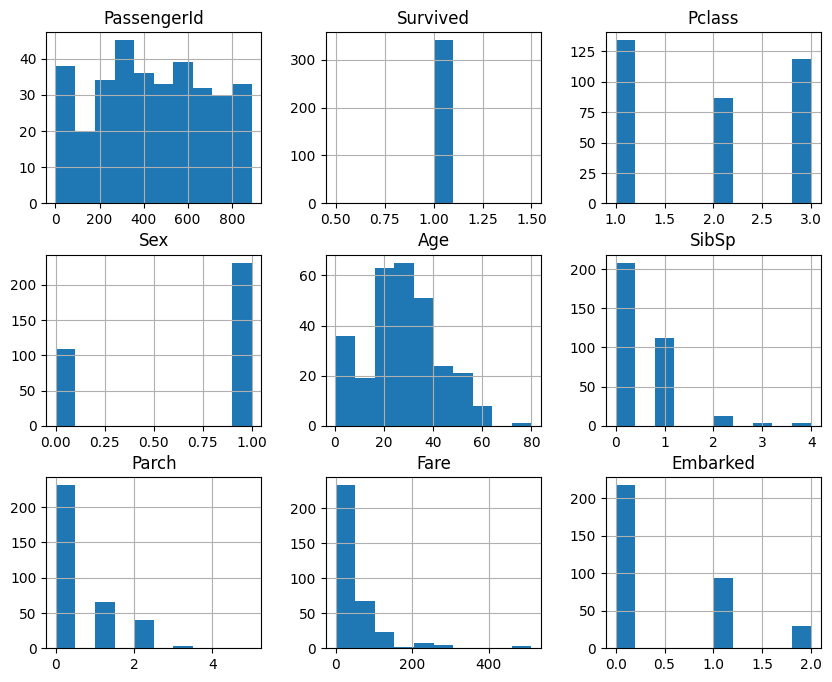

In [ ]:
# Describe survived passengers
train_titanic_dropped[train_titanic_dropped['Survived'] == 1].hist(figsize = (10, 8))
plt.show()


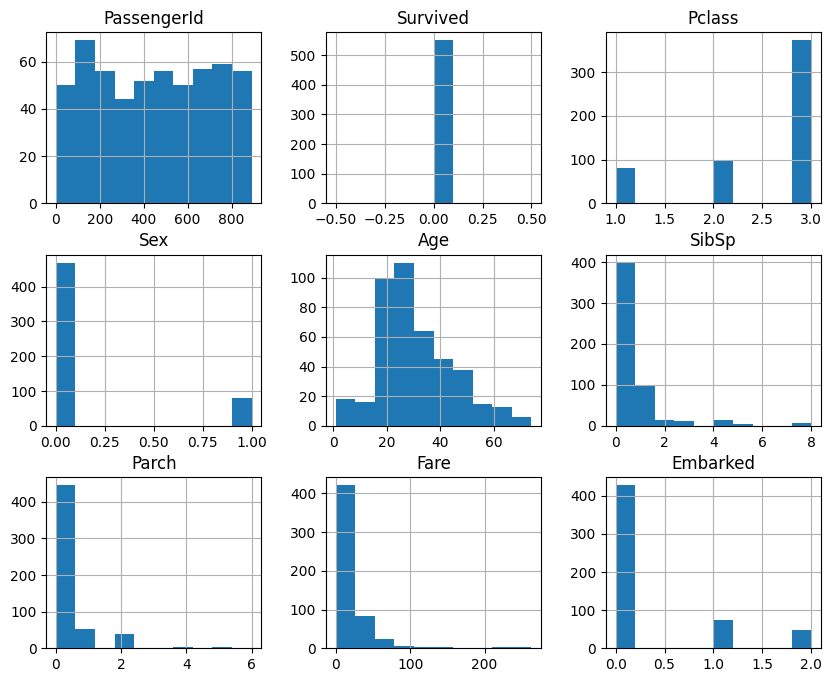

In [ ]:
# Describe no survived passengers
train_titanic_dropped[train_titanic_dropped['Survived'] == 0].hist(figsize = (10, 8))
plt.show()


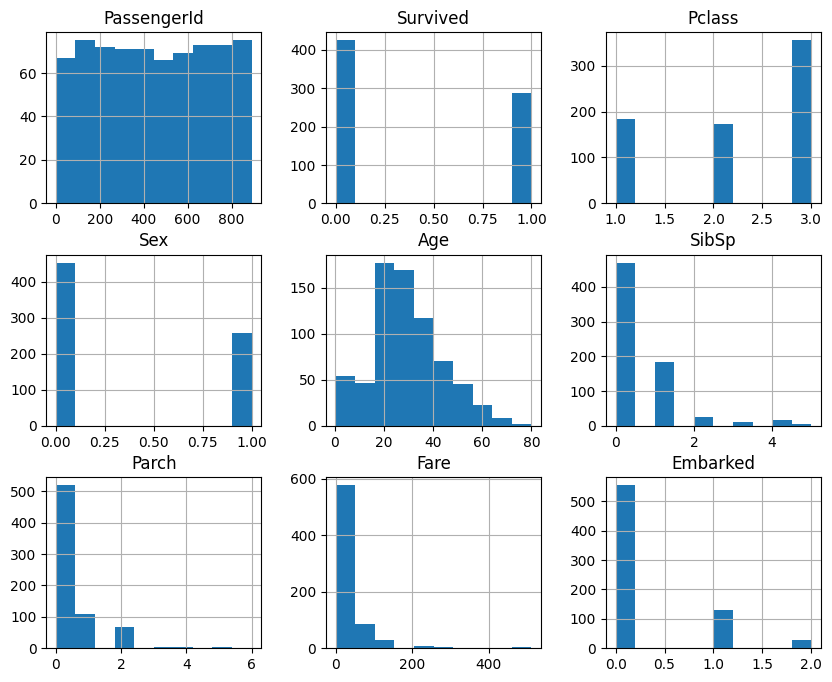

In [ ]:
# histogram check
# (Frequency of determined data)
train_titanic_dropped_age_nan_rows.hist(figsize = (10, 8))
plt.show()
# Survival rate starts to show as expected(low)
# Classes seem ok, just 3 of them
# Age starts to look with high tendency towards young people

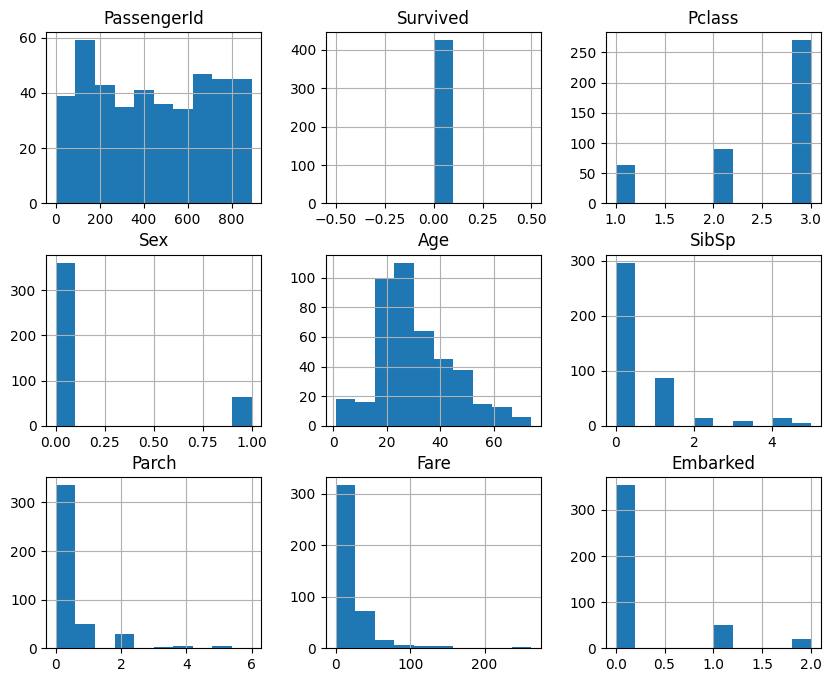

In [ ]:
# Describe no survived passengers
train_titanic_dropped_age_nan_rows[train_titanic_dropped_age_nan_rows['Survived'] == 0].hist(figsize = (10, 8))
plt.show()

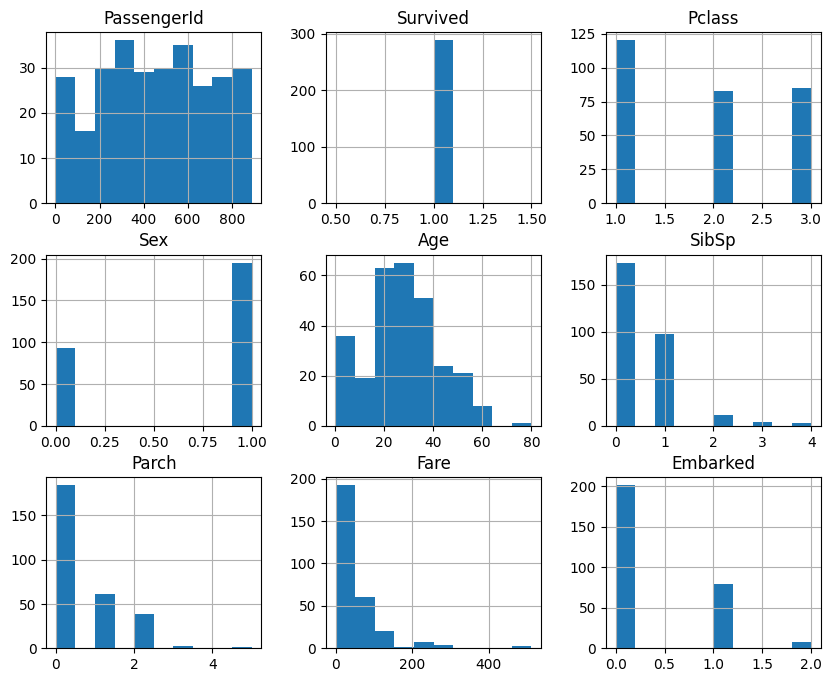

In [ ]:
# Describe survived passengers
train_titanic_dropped_age_nan_rows[train_titanic_dropped_age_nan_rows['Survived'] == 1].hist(figsize = (10, 8))
plt.show()

PassengerId       Axes(0.125,0.653529;0.227941x0.226471)
Survived       Axes(0.398529,0.653529;0.227941x0.226471)
Pclass         Axes(0.672059,0.653529;0.227941x0.226471)
Sex               Axes(0.125,0.381765;0.227941x0.226471)
Age            Axes(0.398529,0.381765;0.227941x0.226471)
SibSp          Axes(0.672059,0.381765;0.227941x0.226471)
Parch                 Axes(0.125,0.11;0.227941x0.226471)
Fare               Axes(0.398529,0.11;0.227941x0.226471)
Embarked           Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

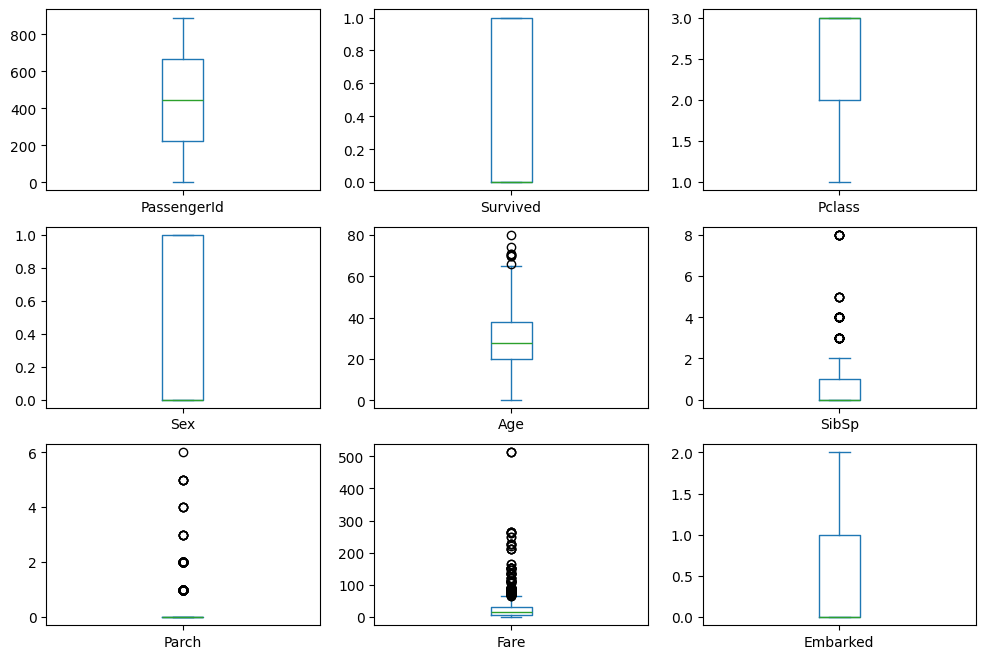

In [ ]:
# boxplots
train_titanic.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (12, 8))
# Confirm that Older Ages were very few (outliers)
# Not a lot of siblings
# Not a lot of parents/children
# Very few paid a high fare

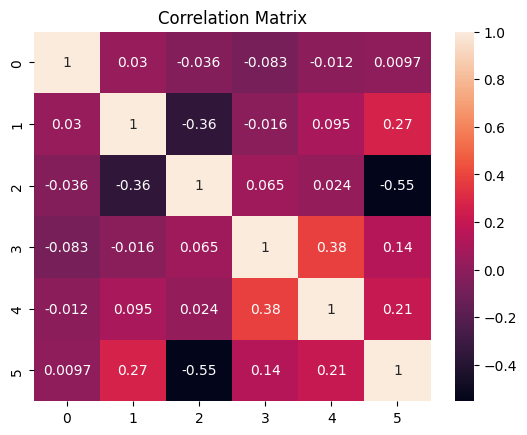

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pyspark.pandas as ps

# heatmap
selected_columns = ['PassengerId',	'Survived',	'Pclass',	'SibSp',	'Parch',	'Fare']
plt.title('Correlation Matrix')
assembler = VectorAssembler(inputCols = selected_columns, outputCol = 'features')
vector = assembler.transform(train_titanic_dropped_age_nan_rows).select('features')
corr = Correlation.corr(vector, 'features').collect()[0][0]

# Convert a DenseMatrix to numpy array
rows = corr.toArray().tolist()
corr_matrix = np.array(rows)
sns.heatmap(corr_matrix, annot = True)
plt.show()

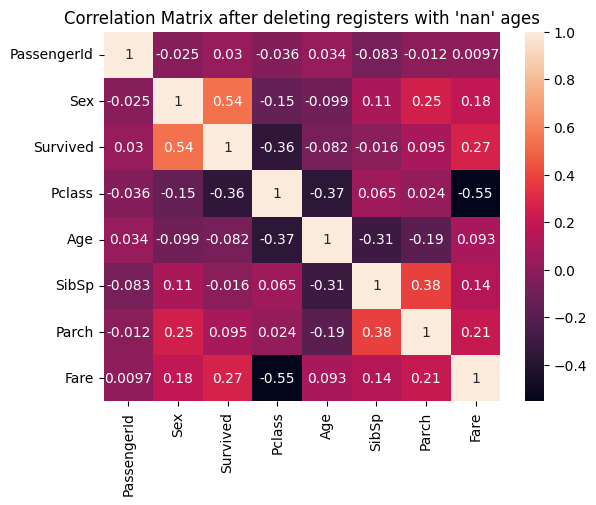

In [ ]:
# heatmap
selected_columns = ['PassengerId', 'Sex',	'Survived',	'Pclass',	'Age',	'SibSp',	'Parch',	'Fare']
plt.title('Correlation Matrix after deleting registers with \'nan\' ages')
column_x = train_titanic_dropped_age_nan_rows[selected_columns]
corr = column_x.corr()
sns.heatmap(corr, annot=True)
plt.show()



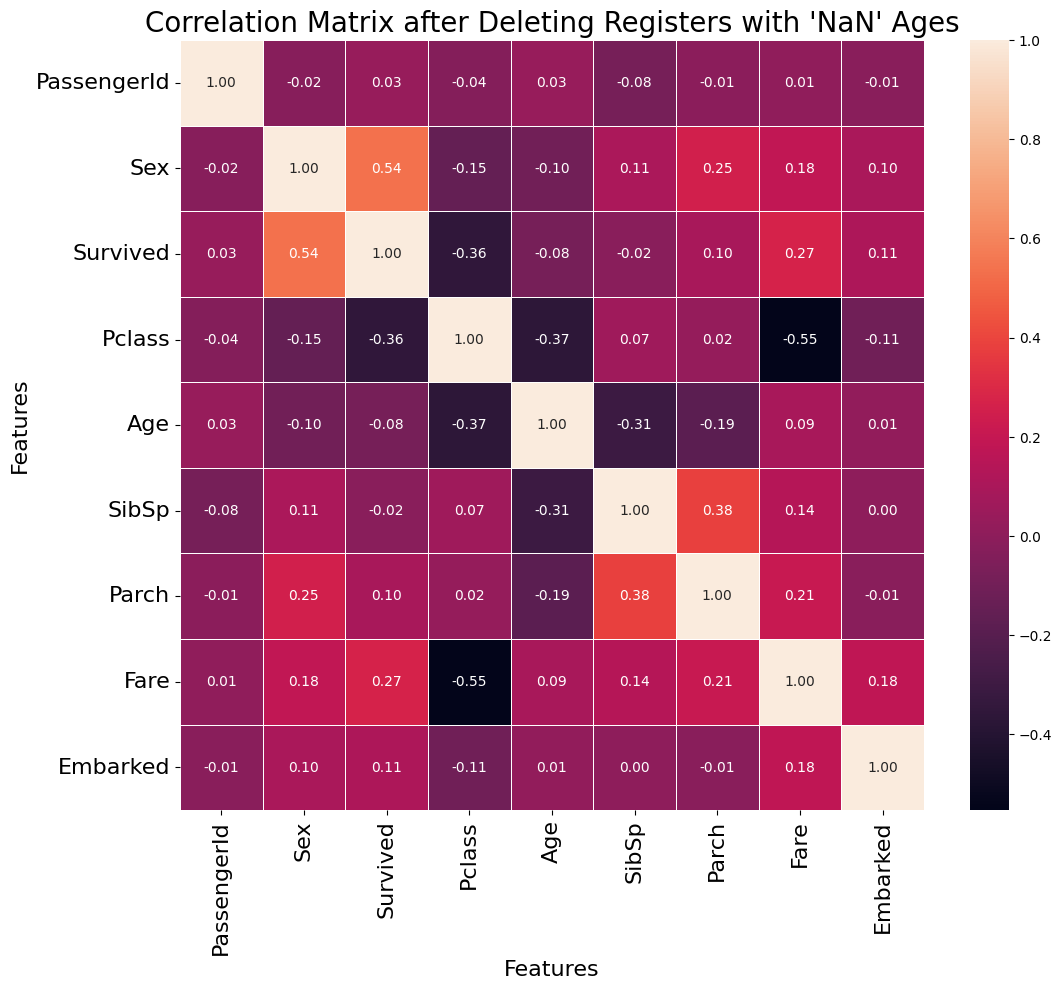

In [ ]:
# Specify the columns for the correlation matrix
selected_columns = ['PassengerId', 'Sex', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
column_x = train_titanic_dropped_age_nan_rows[selected_columns]

# Compute the correlation matrix
corr = column_x.corr()

# Create a larger figure for the heatmap
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed

# Plot the heatmap
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5)

# Set title and labels with increased font sizes
plt.title('Correlation Matrix after Deleting Registers with \'NaN\' Ages', fontsize=20)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)

# Increase font size of tick labels
plt.xticks(fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16, rotation = 0)

# Show the plot
plt.show()


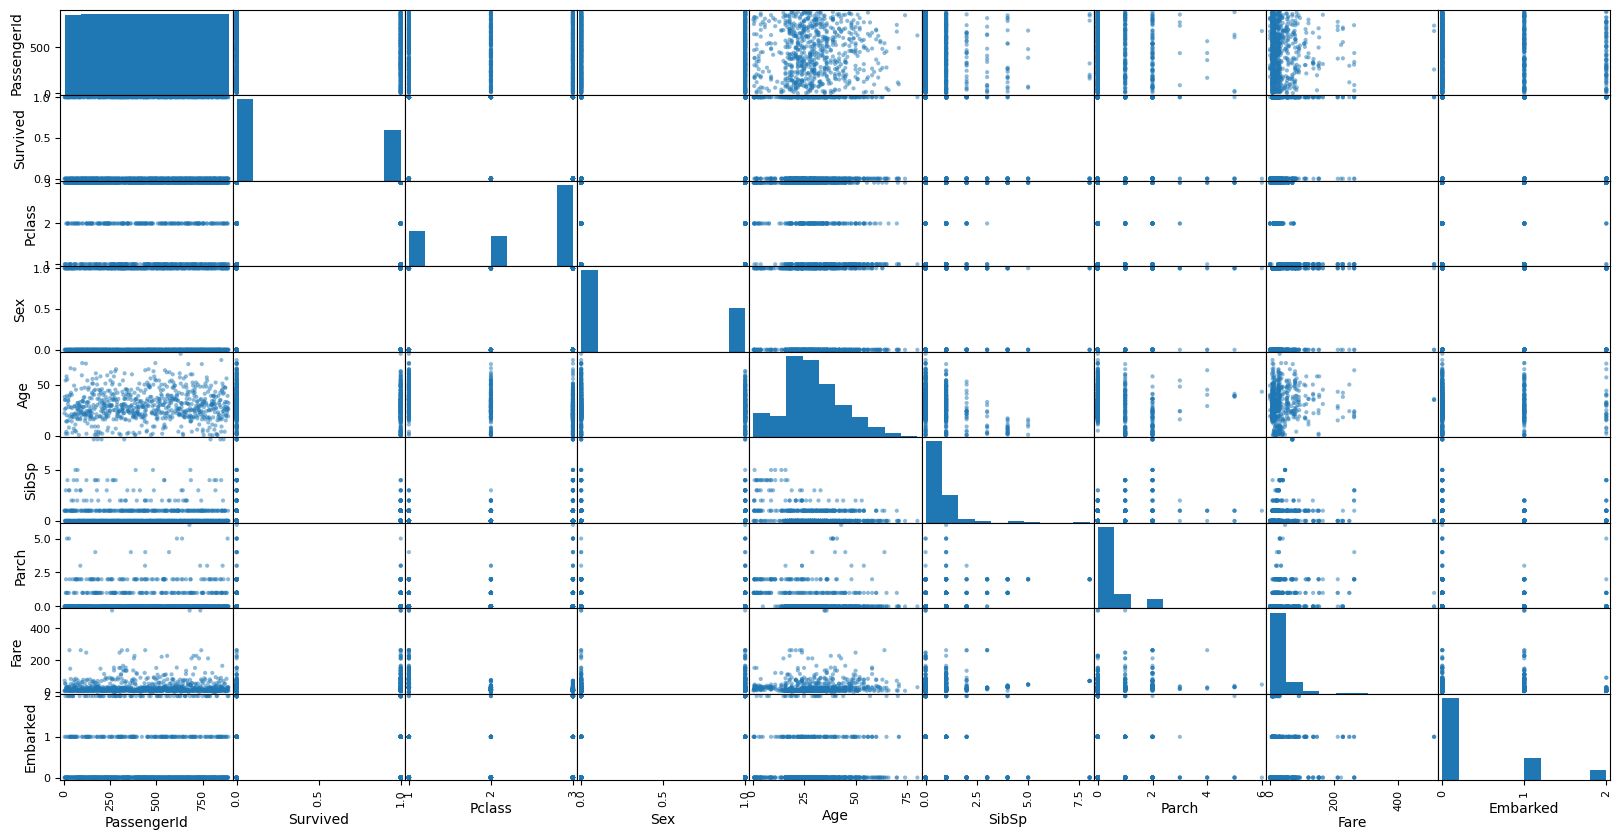

In [ ]:
# Revisions de Scatter plot
pd.plotting.scatter_matrix(train_titanic, figsize = (20, 10))
plt.show()

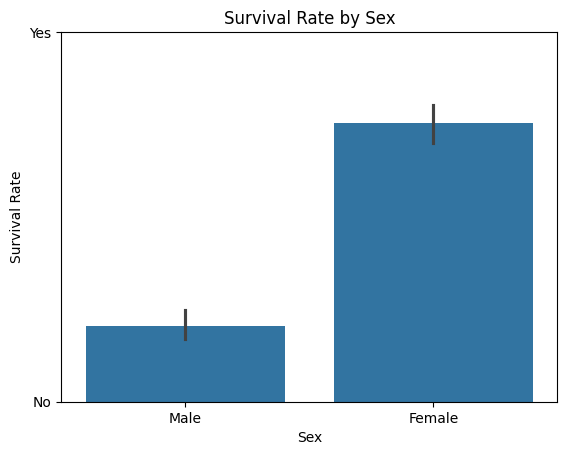

In [ ]:
sns.barplot(x = 'Sex', y = 'Survived', data = train_titanic_dropped_age_nan_rows)

# Customize the axis labels and title
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

# Customize tick labels for better readability
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.yticks(ticks=[0, 1], labels=['No', 'Yes'])

# Display the plot
plt.show()


In [ ]:
# Create a summary DataFrame
summary_df = train_titanic_dropped_age_nan_rows.groupby(['Sex', 'Survived']).size().unstack().fillna(0)
summary_df.columns = ['Not Survived', 'Survived']
summary_df = summary_df.reset_index()

# Plotting with Plotly
fig = px.bar(summary_df,
             x = 'Sex',
             y = ['Not Survived', 'Survived'],
             title = 'Survival Counts by Sex',
             labels = {'value': 'Count', 'Sex': 'Gender'},
             color_discrete_map = {'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto = True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    barmode = 'stack',
    xaxis_title = 'Gender',
    yaxis_title = 'Count',
    legend_title = 'Survival',
    legend = dict(x=0.8, y=0.9),
    xaxis = dict(
        title = 'Gender',  # X-axis title
        tickvals = [0, 1],  # Optional: Set specific tick values if needed
        ticktext = ['Male', 'Female'],  # Custom tick text
    ),
    yaxis = dict(
        title = 'Count',  # Y-axis title
        tickformat = ',',  # Format y-axis ticks with commas for thousands (if needed)
    )
)

# Show plot
fig.show()


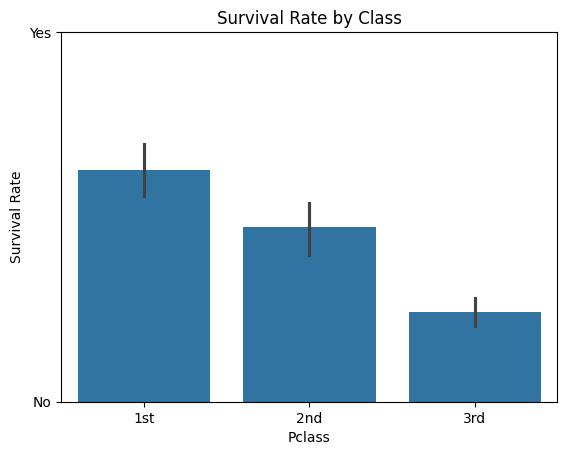

In [ ]:
sns.barplot(x='Pclass', y='Survived', data = train_titanic_dropped)

# Customize the axis labels and title
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class')

# Customize tick labels for better readability
plt.xticks(ticks = [0, 1, 2], labels = ['1st', '2nd', '3rd'])
plt.yticks(ticks = [0, 1], labels = ['No', 'Yes'])

# Display the plot
plt.show()

In [ ]:
# Calculate the survival rate by class
class_survival_rates = train_titanic_dropped.groupby('Pclass')['Survived'].mean().reset_index()
class_survival_rates.columns = ['Pclass', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(class_survival_rates,
             x = 'Pclass',
             y = 'Survival Rate',
             title = 'Survival Rate by Class',
             labels = {'Pclass': 'Class', 'Survival Rate': 'Survival Rate'},
             color = 'Survival Rate',  # Optional: Color bars based on survival rate
             color_continuous_scale = 'Blues',  # Use a blue color scale for a nicer look
             text_auto = True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    xaxis_title = 'Class',
    yaxis_title = 'Survival Rate',
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd'],  # Custom labels for x-axis
    ),
    yaxis = dict(
        tickformat = '.0%',  # Format y-axis ticks as percentages
    ),
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by class
class_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)
class_survival_counts.columns = ['Not Survived', 'Survived']
class_survival_counts = class_survival_counts.reset_index()

# Plotting with Plotly
fig = px.bar(class_survival_counts,
             x = 'Pclass',
             y = ['Not Survived', 'Survived'],
             title = 'Survival Counts by Class With NaN Age',
             labels = {'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map = {'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto = True,  # Add text labels on bars
             barmode = 'stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    xaxis_title = 'Class',
    yaxis_title = 'Count',
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd'],  # Custom labels for x-axis
    ),
    yaxis = dict(
        title = 'Count',  # Y-axis title
    ),
    legend_title = 'Survival Status',
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by class
#WITH NAN AGE
class_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)
class_survival_counts.columns = ['Not Survived', 'Survived']
class_survival_counts = class_survival_counts.reset_index()

# Plotting with Plotly
fig = px.bar(class_survival_counts,
             x = 'Pclass',
             y = ['Not Survived', 'Survived'],
             title = 'Survival Counts by Class WITH NaN Age',
             labels = {'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map = {'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto = True,  # Add text labels on bars
             barmode = 'stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    title = {
        'text': 'Survival Counts by Class WITH NaN Age',
        'font': {'size': 24},  # Title font size
    },
    xaxis_title = {
        'text': 'Class',
        'font': {'size': 20},  # X-axis title font size
    },
    yaxis_title = {
        'text': 'Count',
        'font': {'size': 20},  # Y-axis title font size
    },
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd'],  # Custom labels for x-axis
        tickfont = {'size': 20}  # X-axis tick font size
    ),
    yaxis = dict(
        title = 'Count',  # Y-axis title
        tickfont = {'size': 20}  # Y-axis tick font size
    ),
    legend_title = {
        'text': 'Survival Status',
        'font': {'size': 20}  # Legend title font size
    },
    legend = dict(
        font = {'size': 20}  # Legend font size
    ),
    width = 800,  # Set the width of the plot
    height = 600  # Set the height of the plot
)

# Update text label font size
fig.update_traces(
    textfont = dict(size = 20)  # Font size for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by class
#NON NAN AGE
class_survival_counts = train_titanic_dropped_age_nan_rows.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)
class_survival_counts.columns = ['Not Survived', 'Survived']
class_survival_counts = class_survival_counts.reset_index()

# Plotting with Plotly
fig = px.bar(class_survival_counts,
             x = 'Pclass',
             y = ['Not Survived', 'Survived'],
             title = 'Survival Counts by Class NO NaN Age',
             labels = {'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map = {'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto = True,  # Add text labels on bars
             barmode = 'stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    title = {
        'text': 'Survival Counts by Class NO NaN Age',
        'font': {'size': 24},  # Title font size
    },
    xaxis_title = {
        'text': 'Class',
        'font': {'size': 20},  # X-axis title font size
    },
    yaxis_title = {
        'text': 'Count',
        'font': {'size': 20},  # Y-axis title font size
    },
    xaxis = dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for x-axis
        tickfont={'size': 20}  # X-axis tick font size
    ),
    yaxis = dict(
        title='Count',  # Y-axis title
        tickfont={'size': 20}  # Y-axis tick font size
    ),
    legend_title = {
        'text': 'Survival Status',
        'font': {'size': 20}  # Legend title font size
    },
    legend = dict(
        font={'size': 20}  # Legend font size
    ),
    width = 800,  # Set the width of the plot
    height = 600  # Set the height of the plot
)

# Update text label font size
fig.update_traces(
    textfont = dict(size = 20)  # Font size for text labels inside bars
)

# Show plot
fig.show()


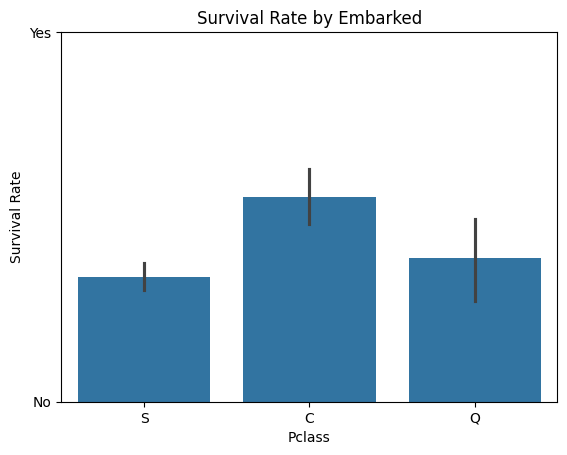

In [ ]:
sns.barplot(x='Embarked', y='Survived', data = train_titanic_dropped)

# Customize the axis labels and title
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarked')

# Customize tick labels for better readability
plt.xticks(ticks = [0, 1, 2], labels = ['S', 'C', 'Q'])
plt.yticks(ticks = [0, 1], labels = ['No', 'Yes'])

# Display the plot
plt.show()

In [ ]:
# Calculate the survival rate by embarkation port
embarked_survival_rates = train_titanic_dropped.groupby('Embarked')['Survived'].mean().reset_index()
embarked_survival_rates.columns = ['Embarked', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(embarked_survival_rates,
             x = 'Embarked',
             y = 'Survival Rate',
             title = 'Survival Rate by Embarked Port',
             labels = {'Embarked': 'Embarked Port', 'Survival Rate': 'Survival Rate'},
             color = 'Survival Rate',  # Optional: Color bars based on survival rate
             color_continuous_scale = 'Viridis',  # Use a color scale for a nicer look
             text_auto = True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    xaxis_title = 'Embarked Port',
    yaxis_title = 'Survival Rate',
    xaxis = dict(
        tickvals = ['C', 'S', 'Q'],
        ticktext = ['Cherbourg', 'Southampton', 'Queenstown'],  # Custom labels for embarkation ports
    ),
    yaxis = dict(
        tickformat = '.0%',  # Format y-axis ticks as percentages
    ),
    width = 800,  # Set the width of the plot
    height = 600  # Set the height of the plot
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival rate by embarkation port
embarked_survival_rates = train_titanic_dropped.groupby('Embarked')['Survived'].mean().reset_index()
embarked_survival_rates.columns = ['Embarked', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(embarked_survival_rates,
             x = 'Embarked',
             y = 'Survival Rate',
             title = 'Survival Rate by Embarked Port',
             labels = {'Embarked': '', 'Survival Rate': 'Survival Rate'},
             color = 'Survival Rate',  # Optional: Color bars based on survival rate

             #color_discrete_map={'0': '#FF9999', '1': '#66B3FF', '2': '#66B3FB'},  # Softer colors

             color_continuous_scale = 'Viridis',  # Use a color scale for a nicer look
             text_auto = True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    title = {
        'text': 'Survival Rate by Embarked Port',
        'font': {'size': 24, 'family': 'Arial'},  # Title font size and family
        'x': 0.5  # Center title
    },

    yaxis_title = {
        'text': 'Survival Rate',
        'font': {'size': 18, 'family': 'Arial'},  # Y-axis title font size and family
    },
    xaxis = dict(
        tickvals = ['0', '1', '2'],
        ticktext = ['Cherbourg', 'Southampton', 'Queenstown'],  # Custom labels for embarkation ports
        tickfont = {'size': 20, 'family': 'Arial'},  # X-axis tick font size and family
    ),
    yaxis = dict(
        tickformat = '.0%',  # Format y-axis ticks as percentages
        tickfont = {'size': 20, 'family': 'Arial'},  # Y-axis tick font size and family
    ),
    width=800,  # Set the width of the plot
    height=600,  # Set the height of the plot
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins
    coloraxis_colorbar={
        'title': 'Survival Rate',  # Title for colorbar
        'tickvals': [0, 0.5, 1],  # Colorbar ticks
        'ticktext': ['Low', 'Medium', 'High'],  # Colorbar labels
        'title_font': {'size': 16, 'family': 'Arial'},  # Colorbar title font size and family
        'tickfont': {'size': 14, 'family': 'Arial'},  # Colorbar tick font size and family
    },
)

# Update text label font size
fig.update_traces(
    #textfont=dict(size=16, color='black'),  # Font size and color for text labels inside bars
 #   marker=dict(line=dict(color='black', width=1))  # Outline color and width for bars

# Update text label font size

    textfont=dict(size=20)  # Font size for text labels inside bars




)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by embarkation port
embarked_survival_counts = train_titanic_dropped.groupby(['Embarked', 'Survived']).size().unstack().fillna(0)
embarked_survival_counts.columns = ['Not Survived', 'Survived']
embarked_survival_counts = embarked_survival_counts.reset_index()

# Plotting with Plotly
fig = px.bar(embarked_survival_counts,
             x='Embarked',
             y=['Not Survived', 'Survived'],
             title='Survival Counts by Embarked Port',
             labels={'Embarked': 'Embarked Port', 'value': 'Count'},
             color_discrete_map={'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    xaxis_title='Embarked Port',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=['C', 'S', 'Q'],
        ticktext=['Cherbourg', 'Southampton', 'Queenstown'],  # Custom labels for embarkation ports
    ),
    yaxis=dict(
        title='Count',  # Y-axis title
    ),
    legend_title='Survival Status',

    width=800,  # Set the width of the plot
    height=600  # Set the height of the plot
)


fig.update_traces(

    textfont=dict(size=20)  # Font size for text labels inside bars




)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by embarkation port
embarked_survival_counts = train_titanic_dropped.groupby(['Embarked', 'Survived']).size().unstack().fillna(0)
embarked_survival_counts.columns = ['Not Survived', 'Survived']
embarked_survival_counts = embarked_survival_counts.reset_index()

# Plotting with Plotly
fig = px.bar(embarked_survival_counts,
             x='Embarked',
             y=['Not Survived', 'Survived'],
             title='Survival Counts by Embarked Port',
             labels={'Embarked': '', 'value': 'Count'},
             color_discrete_map={'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Counts by Embarked Port',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': '',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Count',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=['0', '1', '2'],
        ticktext=['Cherbourg', 'Southampton', 'Queenstown'],  # Custom labels for embarkation ports
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat=',',  # Format y-axis ticks with commas
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Survival Status',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    width=800,  # Set the width of the plot
    height=600,  # Set the height of the plot
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20, color='black')  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by embarkation port, class, and survival status
grouped_counts = train_titanic.groupby(['Embarked', 'Pclass', 'Survived']).size().unstack(level=[2]).fillna(0)

# Calculate total counts for each combination of Embarked and Pclass
total_counts = grouped_counts.sum(axis=1)

# Calculate percentages
grouped_percentages = grouped_counts.div(total_counts, axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
grouped_percentages = grouped_percentages.reset_index()
grouped_percentages.columns = ['Embarked', 'Pclass', 'Not Survived', 'Survived']

# Plotting with Plotly
fig = px.bar(grouped_percentages,
             x='Embarked',
             y=['Not Survived', 'Survived'],
             color='Pclass',
             title='Survival Percentages by Embarked Port and Class',
             labels={'Embarked': 'Embarked Port', 'value': 'Percentage'},
             color_discrete_map={1: '#66B3FF', 2: '#1f77b4', 3: '#a3a500'},  # Softer colors for different classes
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    height=600,  # Adjust height
    width=800,   # Adjust width
    xaxis_title='Embarked Port',
    yaxis_title='Percentage',
    xaxis=dict(
        tickvals=['0', '1', '2'],
        ticktext=['Cherbourg', 'Southampton', 'Queenstown']  # Custom labels for embarkation ports
    ),
    yaxis=dict(
        title='Percentage',  # Y-axis title
        tickformat='.1%'  # Format y-axis as percentages with one decimal place
    ),
    legend_title='Class'
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by embarkation port, class, and survival status
grouped_counts = train_titanic_dropped.groupby(['Embarked', 'Pclass', 'Survived']).size().unstack(level=[2]).fillna(0)

# Calculate total counts for each combination of Embarked and Pclass
total_counts = grouped_counts.sum(axis=1)

# Calculate percentages
grouped_percentages = grouped_counts.div(total_counts, axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
grouped_percentages = grouped_percentages.reset_index()
grouped_percentages.columns = ['Embarked', 'Pclass', 'Not Survived', 'Survived']

# Plotting with Plotly
fig = px.bar(grouped_percentages,
             x='Embarked',
             y=['Not Survived', 'Survived'],
             color='Pclass',
             title='Survival Percentages by Embarked Port and Class',
             labels={'Embarked': '', 'value': 'Percentage'},
             color_discrete_map={1: '#66B3FF', 2: '#1f77b4', 3: '#a3a500'},  # Softer colors for different classes
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Percentages by Embarked Port and Class',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': '',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Percentage',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=['0', '1', '2'],
        ticktext=['Cherbourg', 'Southampton', 'Queenstown'],  # Custom labels for embarkation ports
        tickfont={'size': 16, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat='.1%',  # Format y-axis as percentages with one decimal place
        tickfont={'size': 16, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Class',
        'font': {'size': 18, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 16, 'family': 'Arial'}  # Increase legend font size
    ),
    height=600,  # Adjust height
    width=800,   # Adjust width
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=16)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by Embarked Port, Sex, and Survival Status
grouped_counts = train_titanic_dropped.groupby(['Embarked', 'Sex', 'Survived']).size().unstack(level=[2]).fillna(0)

# Calculate total counts for each combination of Embarked Port and Sex
total_counts = grouped_counts.sum(axis=1)

# Calculate percentages
grouped_percentages = grouped_counts.div(total_counts, axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
grouped_percentages = grouped_percentages.reset_index()
grouped_percentages.columns = ['Embarked', 'Sex', 'Not Survived', 'Survived']

# Plotting with Plotly
fig = px.bar(grouped_percentages,
             x='Embarked',
             y=['Not Survived', 'Survived'],
             color='Sex',
             title='Survival Percentages by Embarked Port and Sex',
             labels={'Embarked': 'Embarked Port', 'value': 'Percentage'},
             color_discrete_map={'female': '#FF9999', 'male': '#66B3FF'},  # Softer colors for gender
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    height=600,  # Adjust height for better visibility
    width=800,   # Adjust width for better visibility
    xaxis_title='Embarked Port',
    yaxis_title='Percentage',
    xaxis=dict(
        tickvals=['0', '1', '2'],
        ticktext=['Cherbourg', 'Southampton', 'Queenstown']  # Custom labels for embarkation ports
    ),
    yaxis=dict(
        title='Percentage',  # Y-axis title
        tickformat='.1%'  # Format y-axis as percentages with one decimal place
    ),
    legend_title='Sex'
)
fig.update_traces(
    textfont=dict(size=16)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival rate by sex and class
survival_rates = train_titanic_dropped.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
survival_rates.columns = ['Class', 'Sex', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(survival_rates,
             x = 'Class',
             y = 'Survival Rate',
             color = 'Sex',  # Color bars by sex
             barmode = 'group',  # Group bars by sex within each class
             title = 'Survival Rate by Class and Sex',
             labels = {'Class': 'Class', 'Survival Rate': 'Survival Rate'},
             color_discrete_map = {'male': '#4A90E2', 'female': '#FF69B4'},  # Custom colors
             text_auto = True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    height = 600,
    width = 600,
    xaxis_title = 'Class',
    yaxis_title = 'Survival Rate',
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd'],  # Custom labels for classes
    ),
    yaxis=dict(
        tickformat='.0%',  # Format y-axis ticks as percentages
    ),
    legend_title='Sex'
)
fig.update_traces(
    textfont=dict(size=16)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival rate by sex and class
survival_rates = train_titanic_dropped.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
survival_rates.columns = ['Class', 'Sex', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(survival_rates,
             x='Class',
             y='Survival Rate',
             color='Sex',  # Color bars by sex
             barmode='group',  # Group bars by sex within each class
             title='Survival Rate by Class and Sex',
             labels={'Class': 'Class', 'Survival Rate': 'Survival Rate'},
             color_discrete_map={'male': '#4A90E2', 'female': '#FF69B4'},  # Custom colors
             text_auto=True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Rate by Class and Sex',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Class',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Survival Rate',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for classes
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat='.0%',  # Format y-axis ticks as percentages
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Sex',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    height=600,  # Adjust height
    width=400,   # Adjust width
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
# Sample DataFrame creation (assuming you have your DataFrame as 'train_titanic_dropped')
# Uncomment and adjust the following line according to your actual DataFrame
# train_titanic_dropped = pd.read_csv('path_to_your_data.csv')

# Calculate the survival rate by sex and class
survival_rates = train_titanic_dropped.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
survival_rates.columns = ['Class', 'Sex', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(survival_rates,
             x='Class',
             y='Survival Rate',
             color='Sex',  # Color bars by sex
             barmode='group',  # Group bars by sex within each class
             title='Survival Rate by Class and Sex',
             labels={'Class': 'Class', 'Survival Rate': 'Survival Rate'},
             color_discrete_map={'male': '#ADD8E6', 'female': '#FFB6C1'},  # Light blue for male and pink for female
             text_auto=True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Rate by Class and Sex',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Class',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Survival Rate',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for classes
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat='.0%',  # Format y-axis ticks as percentages
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Sex',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    height=600,  # Adjust height
    width=800,   # Adjust width
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20)  # Increase font size for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by class, sex, and survival status
class_sex_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_sex_survival_counts = class_sex_survival_counts.reset_index()
class_sex_survival_counts.columns = ['Pclass', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Plotting with Plotly
fig = px.bar(class_sex_survival_counts,
             x='Pclass',
             y=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
             title='Survival Counts by Class and Sex',
             labels={'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map={
                 'Male_Not Survived': '#FF9999',
                 'Male_Survived': '#66B3FF',
                 'Female_Not Survived': '#FFCC99',
                 'Female_Survived': '#99CCFF'
             },  # Softer colors
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for survival counts
             )

# Customize layout
fig.update_layout(
    xaxis_title='Class',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for x-axis
    ),
    yaxis=dict(
        title='Count',  # Y-axis title
    ),
    legend_title='Survival Status by Sex',
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by class, sex, and survival status
class_sex_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_sex_survival_counts = class_sex_survival_counts.reset_index()
class_sex_survival_counts.columns = ['Pclass', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Plotting with Plotly
fig = px.bar(class_sex_survival_counts,
             x='Pclass',
             y=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
             title='Survival Counts by Class and Sex',
             labels={'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map={
                 'Male_Not Survived': '#0133A0',  # Soft blue for not survived males
                 'Male_Survived': '#4B90E2',      # Darker blue for survived males
                 'Female_Not Survived': '#C71585', # Soft pink for not survived females
                 'Female_Survived': '#FF68B4'     # Darker pink for survived females
             },
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for survival counts
             )

# Customize layout
fig.update_layout(
    height=600,  # Increase height
    width=600,   # Decrease width
    xaxis_title='Class',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd']  # Custom labels for x-axis
    ),
    yaxis=dict(
        title='Count'  # Y-axis title
    ),
    legend_title='Survival Status by Sex',
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by class, sex, and survival status
class_sex_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_sex_survival_counts = class_sex_survival_counts.reset_index()
class_sex_survival_counts.columns = ['Pclass', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Plotting with Plotly
fig = px.bar(class_sex_survival_counts,
             x='Pclass',
             y=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
             title='Survival Counts by Class and Sex',
             labels={'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map={
                 'Male_Not Survived': '#A3C4C9',  # Soft blue for not survived males
                 'Male_Survived': '#6C9ABF',      # Darker blue for survived males
                 'Female_Not Survived': '#F4A6A1', # Soft pink for not survived females
                 'Female_Survived': '#F87C7C'     # Darker pink for survived females
             },
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for survival counts
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Counts by Class and Sex',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Class',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Count',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for classes
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Survival Status by Sex',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    height=700,  # Adjust height
    width=800,   # Adjust width
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20, color='black')  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by class, sex, and survival status
class_sex_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Calculate percentages
class_sex_survival_counts_percentage = class_sex_survival_counts.div(class_sex_survival_counts.sum(axis=1), axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_sex_survival_counts_percentage = class_sex_survival_counts_percentage.reset_index()
class_sex_survival_counts_percentage.columns = ['Pclass', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Plotting with Plotly
fig = px.bar(class_sex_survival_counts_percentage,
             x='Pclass',
             y=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
             title='Survival Percentages by Class and Sex',
             labels={'Pclass': 'Class', 'value': 'Percentage'},
             color_discrete_map={
                 'Male_Not Survived': '#A3C4C9',  # Soft blue for not survived males
                 'Male_Survived': '#6C9ABF',      # Darker blue for survived males
                 'Female_Not Survived': '#F4A6A1', # Soft pink for not survived females
                 'Female_Survived': '#F87C7C'     # Darker pink for survived females
             },
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for survival percentages
             )

# Customize layout
fig.update_layout(
    height=600,  # Increase height
    width=600,   # Decrease width
    xaxis_title='Class',
    yaxis_title='Percentage',
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd']  # Custom labels for x-axis
    ),
    yaxis=dict(
        title='Percentage',  # Y-axis title
        tickformat='.0%'  # Format y-axis as percentages
    ),
    legend_title='Survival Status by Sex',
)

# Show plot
fig.show()


In [ ]:
# Calculate the survival count by class, sex, and survival status
class_sex_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Calculate percentages
class_sex_survival_counts_percentage = class_sex_survival_counts.div(class_sex_survival_counts.sum(axis=1), axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_sex_survival_counts_percentage = class_sex_survival_counts_percentage.reset_index()
class_sex_survival_counts_percentage.columns = ['Pclass', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Plotting with Plotly
fig = px.bar(class_sex_survival_counts_percentage,
             x='Pclass',
             y=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
             title='Survival Percentages by Class and Sex',
             labels={'Pclass': 'Class', 'value': 'Percentage'},
             color_discrete_map={
                 'Male_Not Survived': '#A3C4C9',  # Soft blue for not survived males
                 'Male_Survived': '#6C9ABF',      # Darker blue for survived males
                 'Female_Not Survived': '#F4A6A1', # Soft pink for not survived females
                 'Female_Survived': '#F87C7C'     # Darker pink for survived females
             },
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for survival percentages
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Percentages by Class and Sex',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Class',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Percentage',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for x-axis
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        title='Percentage',
        tickformat='.0%',  # Format y-axis as percentages
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Survival Status by Sex',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    height=600,  # Adjust height
    width=800,   # Adjust width
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20, color='black')  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Example DataFrame creation
# Replace this with your actual DataFrame if needed
parch_survival_rates = train_titanic_dropped_age_nan_rows.groupby('Parch')['Survived'].mean().reset_index()
parch_survival_rates.rename(columns={'Survived': 'Survival Rate'}, inplace=True)

# Convert survival rates to percentages and round to two decimal places
parch_survival_rates['Survival Rate'] = (parch_survival_rates['Survival Rate'] * 100).round(2)

# Plotting with Plotly
fig = px.bar(parch_survival_rates,
             x='Parch',
             y='Survival Rate',
             title='Survival Rates by Number of Parents/Children Aboard',
             labels={'Parch': 'Number of Parents/Children Aboard', 'Survival Rate': 'Survival Rate (%)'},
             text='Survival Rate',  # Add text labels on bars
             color='Survival Rate',  # Color bars by survival rate
             color_continuous_scale='Greens',  # Use a continuous color scale
             height=400,  # Adjust height
             width=800   # Adjust width
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Rates by Number of Parents/Children Aboard',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Number of Parents/Children Aboard',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Survival Rate (%)',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat='.2f%',  # Format y-axis as percentages with two decimal places
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Survival Rate',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars and format as percentages
fig.update_traces(
    texttemplate='%{text:.0f}%',  # Format text labels to percentages with two decimal places
    textfont=dict(size=20)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
# Calculate survival rates by SibSp
sibsp_survival_rates = train_titanic_dropped_age_nan_rows.groupby('SibSp')['Survived'].mean().reset_index()

# Convert survival rates to percentages and round to two decimal places
sibsp_survival_rates['Survival Rate (%)'] = (sibsp_survival_rates['Survived'] * 100).round(2)

# Plotting with Plotly
fig = px.bar(sibsp_survival_rates,
             x='SibSp',
             y='Survival Rate (%)',
             title='Survival Rates by Number of Siblings/Spouses Aboard',
             labels={'SibSp': 'Number of Siblings/Spouses Aboard', 'Survival Rate (%)': 'Survival Rate (%)'},
             text='Survival Rate (%)',  # Add text labels on bars
             color='Survival Rate (%)',  # Color bars by survival rate
             color_continuous_scale='Purples',  # Use a continuous color scale
             height=400,  # Adjust height
             width=800   # Adjust width
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Rates by Number of Siblings/Spouses Aboard',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Number of Siblings/Spouses Aboard',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Survival Rate (%)',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat='.2f%',  # Format y-axis as percentages with two decimal places
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Survival Rate',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars and format as percentages
fig.update_traces(
    texttemplate='%{text:.0f}%',  # Format text labels to percentages with two decimal places
    textfont=dict(size=20)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
# Create age bins
bins = [0, 12, 18, 30, 50, 80]  # Define age bins
labels = ['0-12', '13-18', '19-30', '31-50', '51+']  # Labels for bins
train_titanic_dropped['AgeGroup'] = pd.cut(train_titanic_dropped['Age'], bins=bins, labels=labels, right=False)

# Calculate the survival count by class, age group, and survival status
class_age_survival_counts = train_titanic_dropped.groupby(['Pclass', 'AgeGroup', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Calculate percentages
class_age_survival_counts_percentage = class_age_survival_counts.div(class_age_survival_counts.sum(axis=1), axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_age_survival_counts_percentage = class_age_survival_counts_percentage.reset_index()
class_age_survival_counts_percentage.columns = ['Pclass', '0-12_Not Survived', '0-12_Survived', '13-18_Not Survived', '13-18_Survived',
                                               '19-30_Not Survived', '19-30_Survived', '31-50_Not Survived', '31-50_Survived', '51+_Not Survived', '51+_Survived']

# Plotting with Plotly
fig = px.bar(class_age_survival_counts_percentage,
             x='Pclass',
             y=['0-12_Not Survived', '0-12_Survived', '13-18_Not Survived', '13-18_Survived',
                '19-30_Not Survived', '19-30_Survived', '31-50_Not Survived', '31-50_Survived',
                '51+_Not Survived', '51+_Survived'],
             title='Survival Percentages by Class and Age Group',
             labels={'Pclass': 'Class', 'value': 'Percentage'},
             color_discrete_map={
                 '0-12_Not Survived': '#A3C4C9',
                 '0-12_Survived': '#6C9ABF',
                 '13-18_Not Survived': '#F4A6A1',
                 '13-18_Survived': '#F87C7C',
                 '19-30_Not Survived': '#B5B7FF',
                 '19-30_Survived': '#8A8CFF',
                 '31-50_Not Survived': '#FFB5B5',
                 '31-50_Survived': '#FF8A8A',
                 '51+_Not Survived': '#C4E1F5',
                 '51+_Survived': '#9AC0E1'
             },
             text_auto=True,
             barmode='stack'
             )

# Customize layout
fig.update_layout(
    height=600,
    width=600,
    xaxis_title='Class',
    yaxis_title='Percentage',
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd']
    ),
    yaxis=dict(
        title='Percentage',
        tickformat='.0%'
    ),
    legend_title='Survival Status by Age Group',
)

# Show plot
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create age bins
bins = [0, 12, 18, 30, 50, 80]  # Define age bins
labels = ['0-12', '13-18', '19-30', '31-50', '51+']  # Labels for bins
train_titanic_dropped_age_nan_rows['AgeGroup'] = pd.cut(train_titanic_dropped_age_nan_rows['Age'], bins=bins, labels=labels, right=False)

# Calculate the survival count by class, age group, sex, and survival status
class_age_sex_survival_counts = train_titanic_dropped_age_nan_rows.groupby(['Pclass', 'AgeGroup', 'Sex', 'Survived']).size().unstack(level=[2, 3]).fillna(0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_age_sex_survival_counts = class_age_sex_survival_counts.reset_index()
class_age_sex_survival_counts.columns = ['Pclass', 'AgeGroup', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Melt the DataFrame to long format for easier plotting
class_age_sex_survival_counts_long = class_age_sex_survival_counts.melt(
    id_vars=['Pclass', 'AgeGroup'],
    value_vars=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
    var_name='Sex_Survived',
    value_name='Count'
)

# Extract Sex and Survival Status from the column names
class_age_sex_survival_counts_long[['Sex', 'Survived']] = class_age_sex_survival_counts_long['Sex_Survived'].str.split('_', expand=True)
class_age_sex_survival_counts_long = class_age_sex_survival_counts_long.drop(columns='Sex_Survived')

# Define colors
colors = {
    'Male_Survived': '#4A90E2',    # Light blue for survived males
    'Male_Not Survived': '#0033A0', # Dark blue for not survived males
    'Female_Survived': '#FF69B4',  # Light pink for survived females
    'Female_Not Survived': '#C71585'  # Dark pink for not survived females
}

# Create subplots
age_groups = class_age_sex_survival_counts_long['AgeGroup'].unique()
n_age_groups = len(age_groups)

fig = make_subplots(
    rows = 1,
    cols = n_age_groups,
    subplot_titles = [f'Age Group: {age_group}' for age_group in age_groups],
    shared_yaxes = True
)

# Add bar plots for each age group
for i, age_group in enumerate(age_groups):
    age_data = class_age_sex_survival_counts_long[class_age_sex_survival_counts_long['AgeGroup'] == age_group]
    for (sex, survived), group_data in age_data.groupby(['Sex', 'Survived']):
        label = f'{sex} {survived}'
        color = colors[f'{sex}_{survived}']
        fig.add_trace(
            go.Bar(
                x = group_data['Pclass'],
                y = group_data['Count'],
                name = label,
                marker_color = color,
                legendgroup = label,
                offsetgroup = 0,
                width = 0.4
            ),
            row = 1,
            col = i + 1
        )

# Update layout
fig.update_layout(
    height = 600,
    width = 1200,
    title_text = 'Survival Counts by Class, Age Group, and Sex',
    barmode = 'stack',
    xaxis_title = 'Class',
    yaxis_title = 'Count',
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd']
    ),
    legend_title = 'Sex and Survival Status',

)

fig.update_xaxes(title_text = "Class")
fig.update_yaxes(title_text = "Count")

# Show plot
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create age bins
bins = [0, 12, 18, 30, 50, 80]  # Define age bins
labels = ['0-12', '13-18', '19-30', '31-50', '51+']  # Labels for bins
train_titanic_dropped_age_nan_rows['AgeGroup'] = pd.cut(train_titanic_dropped_age_nan_rows['Age'], bins=bins, labels=labels, right=False)

# Calculate the survival count by class, age group, sex, and survival status
class_age_sex_survival_counts = train_titanic_dropped_age_nan_rows.groupby(['Pclass', 'AgeGroup', 'Sex', 'Survived']).size().unstack(level=[2, 3]).fillna(0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_age_sex_survival_counts = class_age_sex_survival_counts.reset_index()
class_age_sex_survival_counts.columns = ['Pclass', 'AgeGroup', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Melt the DataFrame to long format for easier plotting
class_age_sex_survival_counts_long = class_age_sex_survival_counts.melt(
    id_vars=['Pclass', 'AgeGroup'],
    value_vars=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
    var_name='Sex_Survived',
    value_name='Count'
)

# Extract Sex and Survival Status from the column names
class_age_sex_survival_counts_long[['Sex', 'Survived']] = class_age_sex_survival_counts_long['Sex_Survived'].str.split('_', expand=True)
class_age_sex_survival_counts_long = class_age_sex_survival_counts_long.drop(columns='Sex_Survived')

# Define colors
colors = {
    'Male_Survived': '#4A90E2',    # Light blue for survived males
    'Male_Not Survived': '#0033A0', # Dark blue for not survived males
    'Female_Survived': '#FF69B4',  # Light pink for survived females
    'Female_Not Survived': '#C71585'  # Dark pink for not survived females
}

# Create subplots
age_groups = class_age_sex_survival_counts_long['AgeGroup'].unique()
n_age_groups = len(age_groups)

fig = make_subplots(
    rows=1,
    cols=n_age_groups,
    subplot_titles=[f'Age Group: {age_group}' for age_group in age_groups],
    shared_yaxes=True
)

# Add bar plots for each age group
for i, age_group in enumerate(age_groups):
    age_data = class_age_sex_survival_counts_long[class_age_sex_survival_counts_long['AgeGroup'] == age_group]
    for (sex, survived), group_data in age_data.groupby(['Sex', 'Survived']):
        label = f'{sex} {survived}'
        color = colors[f'{sex}_{survived}']
        fig.add_trace(
            go.Bar(
                x=group_data['Pclass'],
                y=group_data['Count'],
                name=label,
                marker_color=color,
                legendgroup=label,
                offsetgroup=0,
                width=0.4
            ),
            row=1,
            col=i + 1
        )

# Update layout
fig.update_layout(
    height = 600,
    width = 1200,
    title_text = 'Survival Counts by Class, Age Group, and Sex',
    title_font = dict(size = 28),  # Increase main title font size
    barmode = 'stack',
    xaxis_title = dict(
        text = 'Class',
        font = dict(size = 22)  # Increase X-axis title font size
    ),
    yaxis_title = dict(
        text = 'Count',
        font = dict(size = 22)  # Increase Y-axis title font size
    ),
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd'],
        tickfont = dict(size = 16)  # Increase X-axis tick font size
    ),
    yaxis = dict(
        title = 'Count',
        tickfont = dict(size = 16),  # Increase Y-axis tick font size
        tickformat = ','
    ),
    legend_title = dict(
        text = 'Sex and Survival Status',
        font = dict(size = 18)  # Increase legend title font size
    ),
    legend = dict(
        font = dict(size = 16)  # Increase legend item font size
    ),
    margin = dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update x-axes for each subplot to ensure consistent tick labels
for i in range(1, n_age_groups + 1):
    fig.update_xaxes(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],
        row=1,
        col=i,
        title_text="Class",
        title_font=dict(size=18),  # Increase X-axis title font size
        tickfont=dict(size=20)  # Increase X-axis tick font size
    )

# Update y-axes for each subplot to ensure consistent title and tick labels
for i in range(1, n_age_groups + 1):
    fig.update_yaxes(
        title_text="Count",
        title_font=dict(size=22),  # Increase Y-axis title font size
        tickfont=dict(size=20),  # Increase Y-axis tick font size
        row=1,
        col=i
    )

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20)  # Increase font size for text labels inside bars
)

# Show plot
fig.show()


In [ ]:
import pandas as pd

# Assuming `train_titanic_dropped_age_nan_rows` is your DataFrame
# Create age bins and labels
bins = [0, 12, 18, 30, 50, 80]  # Define age bins
labels = ['0-12', '13-18', '19-30', '31-50', '51+']  # Labels for bins

# Assign age groups
train_titanic_dropped_age_nan_rows['AgeGroup'] = pd.cut(train_titanic_dropped_age_nan_rows['Age'], bins=bins, labels=labels, right=False)

# Total count of males and females by class that survivev
total_by_class_and_sex = train_titanic_dropped_age_nan_rows.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Count')
total_by_class_and_sex.columns = ['Class', 'Sex', 'Survived','Count']
total_by_class_and_sex['Sex'] = total_by_class_and_sex['Sex'].replace({'male': 'Male', 'female': 'Female'})
total_by_class_and_sex['Class'] = total_by_class_and_sex['Class'].map({1: '1st', 2: '2nd', 3: '3rd'})

print("Total count of males and females by class (not survived = 0):")
print(total_by_class_and_sex.to_string(index=False))

# Total count of males and females by age group, class and survival
total_by_age_group_and_sex = train_titanic_dropped_age_nan_rows.groupby(['AgeGroup', 'Sex', 'Pclass','Survived']).size().reset_index(name='Count')
total_by_age_group_and_sex.columns = ['Age Group', 'Sex','Pclass', 'Survived', 'Count']
total_by_age_group_and_sex['Sex'] = total_by_age_group_and_sex['Sex'].replace({'male': 'Male', 'female': 'Female'})

print("\nTotal count of males and females by age group and class:")
print(total_by_age_group_and_sex.to_string(index=False))

# Total counts by class
total_by_class = train_titanic_dropped_age_nan_rows.groupby(['Pclass']).size().reset_index(name='Total Count')
total_by_class.columns = ['Class', 'Total Count']
total_by_class['Class'] = total_by_class['Class'].map({1: '1st', 2: '2nd', 3: '3rd'})

print("\nTotal count by class:")
print(total_by_class.to_string(index=False))

# Total counts by age group
total_by_age_group = train_titanic_dropped_age_nan_rows.groupby(['AgeGroup']).size().reset_index(name='Total Count')
total_by_age_group.columns = ['Age Group', 'Total Count']

print("\nTotal count by age group:")
print(total_by_age_group.to_string(index=False))


Total count of males and females by class (not survived = 0):
Class  Sex  Survived  Count
  1st    0         0     61
  1st    0         1     40
  1st    1         0      3
  1st    1         1     80
  2nd    0         0     84
  2nd    0         1     15
  2nd    1         0      6
  2nd    1         1     68
  3rd    0         0    215
  3rd    0         1     38
  3rd    1         0     55
  3rd    1         1     47

Total count of males and females by age group and class:
Age Group  Sex  Pclass  Survived  Count
     0-12    0       1         0      0
     0-12    0       1         1      3
     0-12    0       2         0      0
     0-12    0       2         1      9
     0-12    0       3         0     16
     0-12    0       3         1      8
     0-12    1       1         0      1
     0-12    1       1         1      0
     0-12    1       2         0      0
     0-12    1       2         1      8
     0-12    1       3         0     12
     0-12    1       3         1    

In [ ]:
# Assuming `train_titanic_dropped_age_nan_rows` is your DataFrame
# Create age bins and labels
bins = [0, 12, 18, 30, 50, 80]  # Define age bins
labels = ['0-12', '13-18', '19-30', '31-50', '51+']  # Labels for bins

# Assign age groups
train_titanic_dropped_age_nan_rows['AgeGroup'] = pd.cut(train_titanic_dropped_age_nan_rows['Age'], bins=bins, labels=labels, right=False)

# Total count of males and females by class
total_by_class_and_sex = train_titanic_dropped_age_nan_rows.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')
total_by_class_and_sex.columns = ['Class', 'Sex', 'Count']
total_by_class_and_sex['Sex'] = total_by_class_and_sex['Sex'].map({'male': 'Male', 'female': 'Female'})
total_by_class_and_sex['Class'] = total_by_class_and_sex['Class'].map({1: '1st', 2: '2nd', 3: '3rd'})

print("Total count of males and females by class:")
print(total_by_class_and_sex.to_string(index=False))

# Total count of males and females by age group
total_by_age_group_and_sex = train_titanic_dropped_age_nan_rows.groupby(['AgeGroup', 'Sex']).size().reset_index(name='Count')
total_by_age_group_and_sex.columns = ['Age Group', 'Sex', 'Count']
total_by_age_group_and_sex['Sex'] = total_by_age_group_and_sex['Sex'].map({'0': 'Male', '1': 'Female'})

print("\nTotal count of males and females by age group:")
print(total_by_age_group_and_sex.to_string(index=False))

# Total counts by class
total_by_class = train_titanic_dropped_age_nan_rows.groupby(['Pclass']).size().reset_index(name='Total Count')
total_by_class.columns = ['Class', 'Total Count']
total_by_class['Class'] = total_by_class['Class'].map({1: '1st', 2: '2nd', 3: '3rd'})

print("\nTotal count by class:")
print(total_by_class.to_string(index=False))

# Total counts by age group
total_by_age_group = train_titanic_dropped_age_nan_rows.groupby(['AgeGroup']).size().reset_index(name='Total Count')
total_by_age_group.columns = ['Age Group', 'Total Count']

print("\nTotal count by age group:")
print(total_by_age_group.to_string(index=False))


Total count of males and females by class:
Class Sex  Count
  1st NaN    101
  1st NaN     83
  2nd NaN     99
  2nd NaN     74
  3rd NaN    253
  3rd NaN    102

Total count of males and females by age group:
Age Group Sex  Count
     0-12 NaN     36
     0-12 NaN     32
    13-18 NaN     22
    13-18 NaN     23
    19-30 NaN    179
    19-30 NaN     92
    31-50 NaN    164
    31-50 NaN     91
      51+ NaN     51
      51+ NaN     21

Total count by class:
Class  Total Count
  1st          184
  2nd          173
  3rd          355

Total count by age group:
Age Group  Total Count
     0-12           68
    13-18           45
    19-30          271
    31-50          255
      51+           72


### Step 4: Feature Engineering

For the dataset with Age with NaN rows:

In [ ]:
train_titanic_dropped_age_nan_rows.head(50)

[Row(PassengerId=1, Survived=0, Pclass=3, Sex='0', Age=22.0, SibSp=1, Parch=0, Fare=7.25, Embarked='3'),
 Row(PassengerId=2, Survived=1, Pclass=1, Sex='1', Age=38.0, SibSp=1, Parch=0, Fare=71.2833, Embarked='1'),
 Row(PassengerId=3, Survived=1, Pclass=3, Sex='1', Age=26.0, SibSp=0, Parch=0, Fare=7.925, Embarked='3'),
 Row(PassengerId=4, Survived=1, Pclass=1, Sex='1', Age=35.0, SibSp=1, Parch=0, Fare=53.1, Embarked='3'),
 Row(PassengerId=5, Survived=0, Pclass=3, Sex='0', Age=35.0, SibSp=0, Parch=0, Fare=8.05, Embarked='3'),
 Row(PassengerId=7, Survived=0, Pclass=1, Sex='0', Age=54.0, SibSp=0, Parch=0, Fare=51.8625, Embarked='3'),
 Row(PassengerId=8, Survived=0, Pclass=3, Sex='0', Age=2.0, SibSp=3, Parch=1, Fare=21.075, Embarked='3'),
 Row(PassengerId=9, Survived=1, Pclass=3, Sex='1', Age=27.0, SibSp=0, Parch=2, Fare=11.1333, Embarked='3'),
 Row(PassengerId=10, Survived=1, Pclass=2, Sex='1', Age=14.0, SibSp=1, Parch=0, Fare=30.0708, Embarked='1'),
 Row(PassengerId=11, Survived=1, Pclass=

In [ ]:
# Define the mapping from age group strings to integers
age_group_mapping = {
    '0-12': 0,
    '13-18': 1,
    '19-30': 2,
    '31-50': 3,
    '51+': 4
}

# Apply the mapping to the 'AgeGroup' column
train_titanic_dropped_age_nan_rows = train_titanic_dropped_age_nan_rows['AgeGroup'].map(age_group_mapping)

# Verify the DataFrame
print("DataFrame after Mapping:")
print(train_titanic_dropped_age_nan_rows)

# Optional: Further factorize if needed
# Factorize will convert the values to unique integers if required, though they are already integers
train_titanic_dropped_age_nan_rows['AgeGroup'], unique = pd.factorize(train_titanic_dropped_age_nan_rows['AgeGroup'])

# Verify the DataFrame after optional factorization
print("\nDataFrame after Optional Factorization:")
print(train_titanic_dropped_age_nan_rows)

DataFrame after Mapping:
     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    0  22.0      1      0   7.2500   
1              2         1       1    1  38.0      1      0  71.2833   
2              3         1       3    1  26.0      0      0   7.9250   
3              4         1       1    1  35.0      1      0  53.1000   
4              5         0       3    0  35.0      0      0   8.0500   
..           ...       ...     ...  ...   ...    ...    ...      ...   
885          886         0       3    1  39.0      0      5  29.1250   
886          887         0       2    0  27.0      0      0  13.0000   
887          888         1       1    1  19.0      0      0  30.0000   
889          890         1       1    0  26.0      0      0  30.0000   
890          891         0       3    0  32.0      0      0   7.7500   

     Embarked AgeGroup  
0           0        2  
1           1        3  
2           0        2  
3         

In [ ]:
train_titanic_dropped_age_nan_rows.show()

+-----------+--------+------+---+----+-----+-----+-------+--------+
|PassengerId|Survived|Pclass|Sex| Age|SibSp|Parch|   Fare|Embarked|
+-----------+--------+------+---+----+-----+-----+-------+--------+
|          1|       0|     3|  0|22.0|    1|    0|   7.25|       3|
|          2|       1|     1|  1|38.0|    1|    0|71.2833|       1|
|          3|       1|     3|  1|26.0|    0|    0|  7.925|       3|
|          4|       1|     1|  1|35.0|    1|    0|   53.1|       3|
|          5|       0|     3|  0|35.0|    0|    0|   8.05|       3|
|          7|       0|     1|  0|54.0|    0|    0|51.8625|       3|
|          8|       0|     3|  0| 2.0|    3|    1| 21.075|       3|
|          9|       1|     3|  1|27.0|    0|    2|11.1333|       3|
|         10|       1|     2|  1|14.0|    1|    0|30.0708|       1|
|         11|       1|     3|  1| 4.0|    1|    1|   16.7|       3|
|         12|       1|     1|  1|58.0|    0|    0|  26.55|       3|
|         13|       0|     3|  0|20.0|    0|    

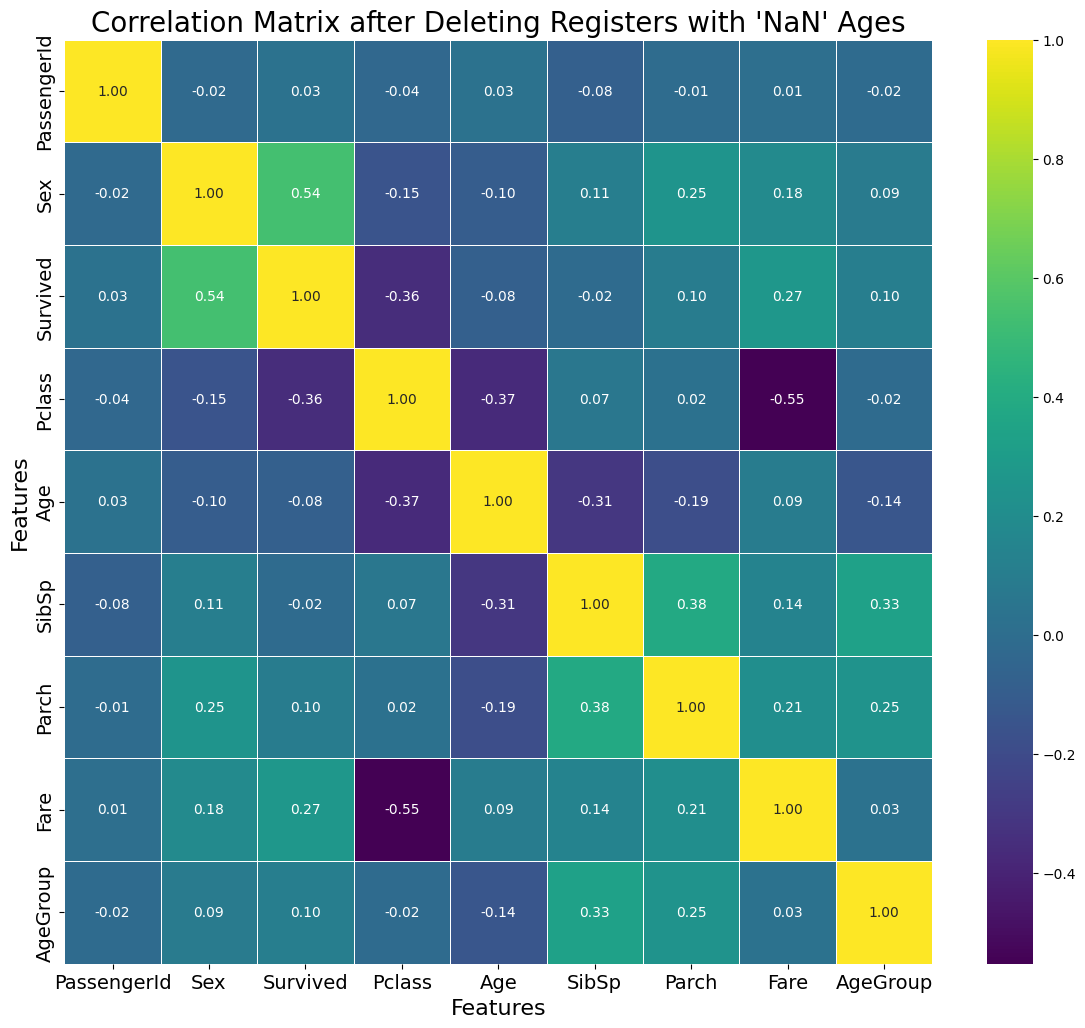

In [ ]:
# Specify the columns for the correlation matrix
selected_columns = ['PassengerId', 'Sex', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'AgeGroup']
column_x = train_titanic_dropped_age_nan_rows[selected_columns]

# Compute the correlation matrix
corr = column_x.corr()

# Create a larger figure for the heatmap
plt.figure(figsize=(14, 12))  # Adjust the width and height as needed

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Set title and labels
plt.title('Correlation Matrix after Deleting Registers with \'NaN\' Ages', fontsize=20)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)

# Increase font size of tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()


In [ ]:
# Feature selection (no labels)
features = ['Sex','Pclass', 'AgeGroup', 'Age','SibSp',	'Parch', 'Fare']# , 'Embarked'
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']

# Hiperparameters testing:
# 1. With features = ['Sex','Pclass', 'Age', 'Fare','SibSp',	'Parch']#:          74, 6, 19 44 SVM 2nd best (no age group)
# 2. ['Sex','Pclass', 'Age', 'Fare'] : 78, 2, 28, 35 (no age group)
# 3. ['Sex','Pclass', 'Age'] : 78, 2, 30, 36 (no age group)
# 4. ['Sex','Pclass', 'AgeGroup'] ------there should be an important change after this----- (this got worse)
# 5. ['Sex','Pclass', 'AgeGroup', 'Age','SibSp',	'Parch', 'Fare' ]               74, 6, 18, 45 SVM best (with AgeGroup)
# 6. ['Sex','Pclass', 'AgeGroup', 'Age','SibSp',	'Parch', 'Fare', 'Embarked' ]#  71, 9, 16, 47 SVM (improved True negatives but True positives worsen)


In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 5: ML Model
**One proposed ML model:** Multivariable Logistic Regression (Sex, PClass and Age)

In [ ]:
from sklearn.feature_selection import RFE

# Define a function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1, classification_report(y_test, y_pred, output_dict=True)

# Define the feature subsets
feature_subsets = [
    ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
    ['Sex', 'AgeGroup', 'Age', 'Fare'],
    ['Pclass', 'AgeGroup', 'Fare'],
    ['Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
    ['Sex', 'Pclass', 'AgeGroup', 'Age', 'Fare', 'Embarked'],
]

results = {}
for features in feature_subsets:
    print(f"\nEvaluating features: {features}")
    X = train_titanic_dropped_age_nan_rows[features]
    y = train_titanic_dropped_age_nan_rows['Survived']

    # Split and standardize
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for name, model in models.items():
        print(f"\nTraining {name} with features: {features}...")
        accuracy, f1, report = evaluate_model(model, X_train, X_test, y_train, y_test)

        results[(name, tuple(features))] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'classification_report': report
        }

# Identify the top 3 models based on accuracy or F1 score
top_models = sorted(results.items(), key=lambda x: x[1]['f1_score'], reverse=True)[:3]
for (name, features), result in top_models:
    print(f"\nTop Model: {name} with features {features}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])


from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Naive Bayes': {},
    'k-NN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Iterate through each model and parameter grid
best_models = {}
for name, model in models.items():
    print(f"\nPerforming Grid Search for {name}...")

    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model  # No hyperparameters to tune

# Evaluate the best models
for name, model in best_models.items():
    print(f"\nEvaluating best model for {name}...")
    accuracy, f1, report = evaluate_model(model, X_train, X_test, y_train, y_test)

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'classification_report': report
    }

# Identify the top 3 models based on accuracy or F1 score
top_models = sorted(results.items(), key=lambda x: x[1]['f1_score'], reverse=True)[:3]
for name, result in top_models:
    print(f"\nTop Model: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])



Evaluating features: ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

Training Logistic Regression with features: ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']...

Training Decision Tree with features: ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']...

Training Random Forest with features: ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']...

Training Support Vector Machine with features: ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']...

Training Naive Bayes with features: ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']...

Training k-NN with features: ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']...

Evaluating features: ['Sex', 'AgeGroup', 'Age', 'Fare']

Training Logistic Regression with features: ['Sex', 'AgeGroup', 'Age', 'Fare']...

Training Decision Tree with features: ['Sex', 'AgeGroup'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a TensorFlow model
def create_tensorflow_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define TensorFlow model
def create_tensorflow_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'TensorFlow Model': create_tensorflow_model(X_train.shape[1])  # TensorFlow model
}

# Feature selection and preprocessing
features = ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a function to evaluate TensorFlow models
def evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test):
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.1)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1, y_pred

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"\n\nTraining {name}...")

    if name == 'TensorFlow Model':
        accuracy, f1, y_pred = evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': report
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)

# Plot confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust the grid size if needed
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




Training Logistic Regression...
Logistic Regression Accuracy: 0.8042
Logistic Regression F1 Score: 0.7544
Classification Report:
{'0': {'precision': 0.782608695652174, 'recall': 0.9, 'f1-score': 0.8372093023255814, 'support': 80.0}, '1': {'precision': 0.8431372549019608, 'recall': 0.6825396825396826, 'f1-score': 0.7543859649122807, 'support': 63.0}, 'accuracy': 0.8041958041958042, 'macro avg': {'precision': 0.8128729752770674, 'recall': 0.7912698412698413, 'f1-score': 0.7957976336189311, 'support': 143.0}, 'weighted avg': {'precision': 0.8092751238531289, 'recall': 0.8041958041958042, 'f1-score': 0.8007206991295119, 'support': 143.0}}


Training Decision Tree...
Decision Tree Accuracy: 0.7203
Decision Tree F1 Score: 0.6667
Classification Report:
{'0': {'precision': 0.7325581395348837, 'recall': 0.7875, 'f1-score': 0.7590361445783133, 'support': 80.0}, '1': {'precision': 0.7017543859649122, 'recall': 0.6349206349206349, 'f1-score': 0.6666666666666666, 'support': 63.0}, 'accuracy': 0.7

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 6, but received input with shape (32, 8)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 8), dtype=float32)
  • training=True
  • mask=None

with loss function



Training Logistic Regression...
Logistic Regression Accuracy: 0.8042
Logistic Regression F1 Score: 0.7544
Classification Report:
{'0': {'precision': 0.782608695652174, 'recall': 0.9, 'f1-score': 0.8372093023255814, 'support': 80.0}, '1': {'precision': 0.8431372549019608, 'recall': 0.6825396825396826, 'f1-score': 0.7543859649122807, 'support': 63.0}, 'accuracy': 0.8041958041958042, 'macro avg': {'precision': 0.8128729752770674, 'recall': 0.7912698412698413, 'f1-score': 0.7957976336189311, 'support': 143.0}, 'weighted avg': {'precision': 0.8092751238531289, 'recall': 0.8041958041958042, 'f1-score': 0.8007206991295119, 'support': 143.0}}


Training Decision Tree...
Decision Tree Accuracy: 0.7203
Decision Tree F1 Score: 0.6721
Classification Report:
{'0': {'precision': 0.7380952380952381, 'recall': 0.775, 'f1-score': 0.7560975609756098, 'support': 80.0}, '1': {'precision': 0.6949152542372882, 'recall': 0.6507936507936508, 'f1-score': 0.6721311475409836, 'support': 63.0}, 'accuracy': 0.72

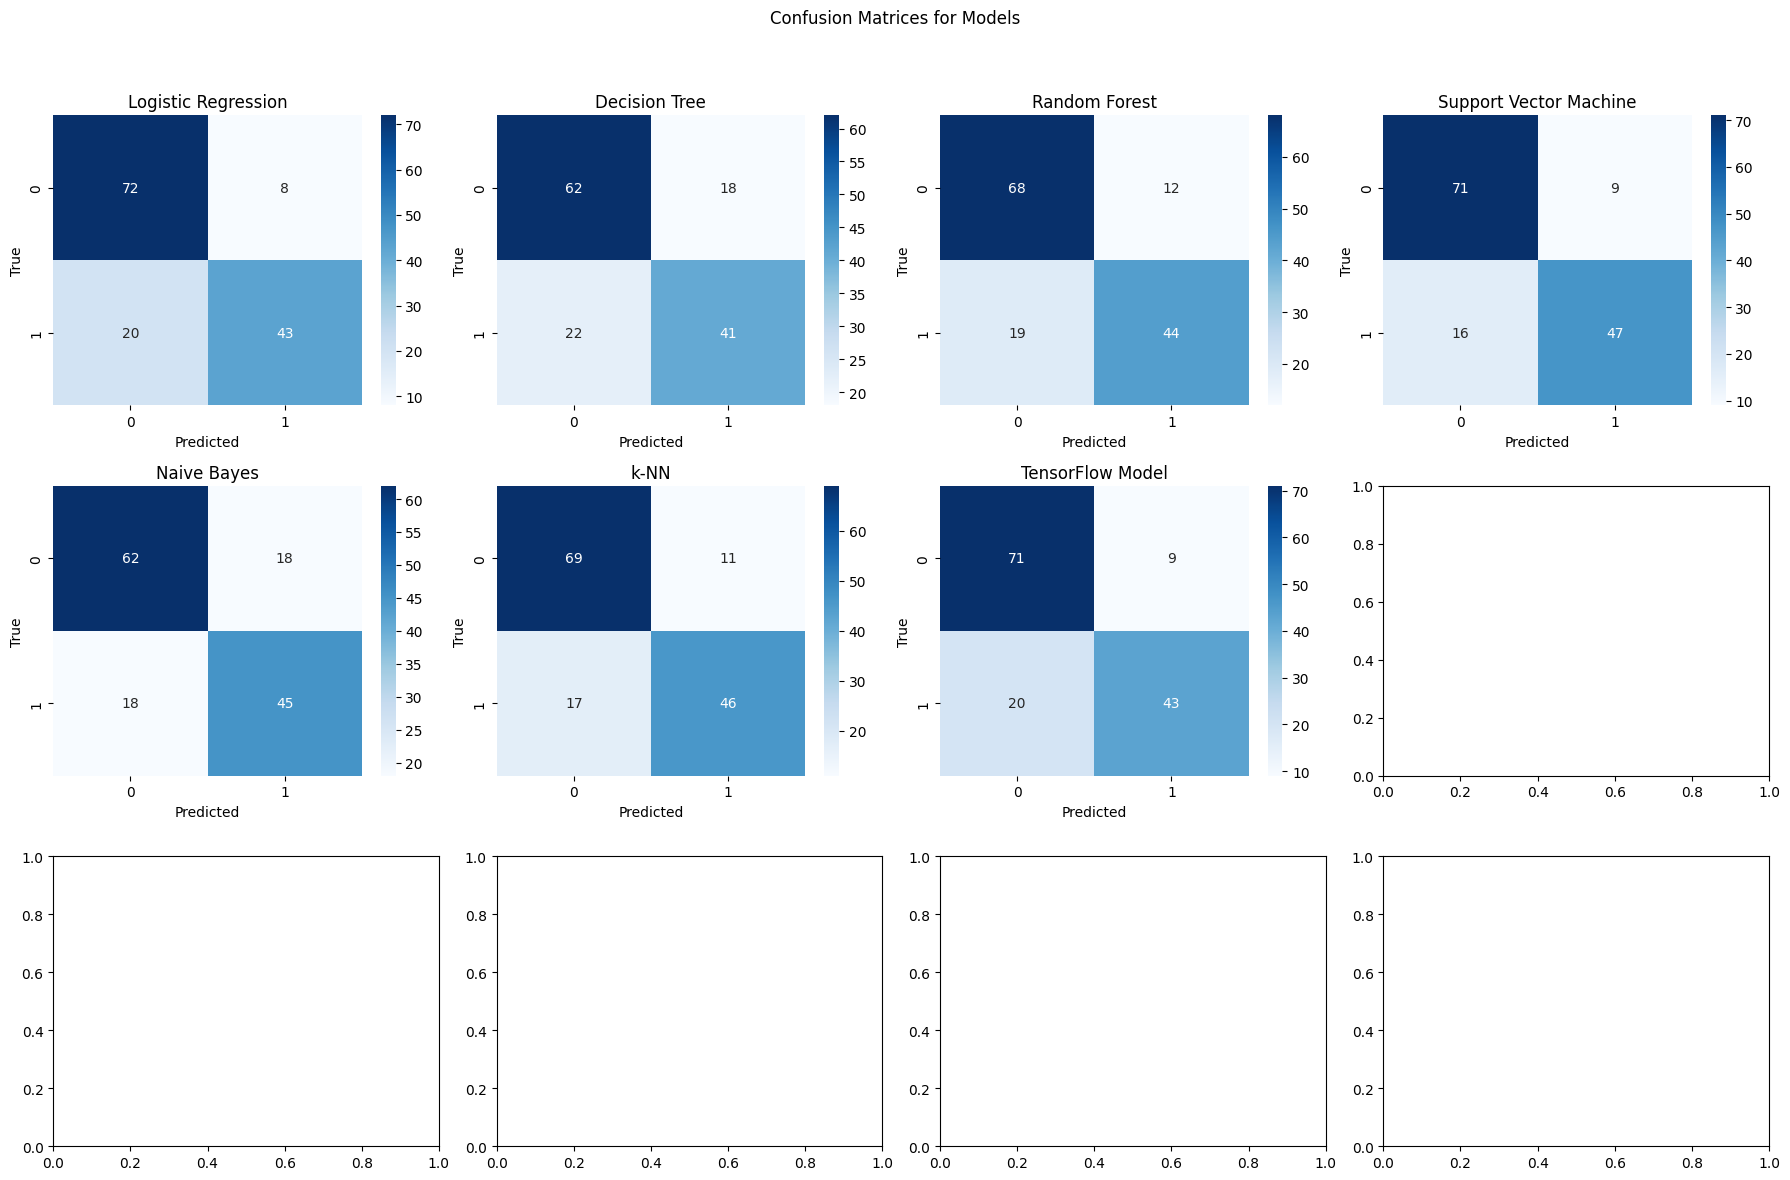

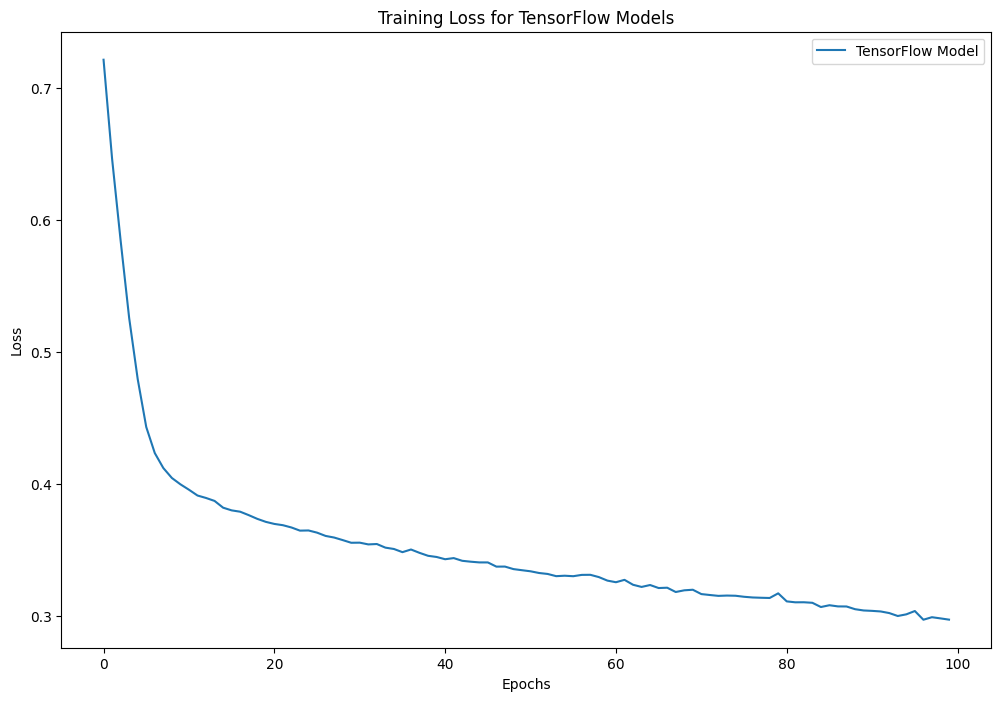

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define TensorFlow model
def create_tensorflow_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'TensorFlow Model': create_tensorflow_model(X_train.shape[1])  # TensorFlow model
}
'''
# Feature selection and preprocessing
features = ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
# Define a function to evaluate TensorFlow models and track cost
def evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test):
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.1)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1, y_pred, history.history['loss']

# Train models and evaluate
results = {}
losses = {}  # To store loss values for plotting

for name, model in models.items():
    print(f"\n\nTraining {name}...")

    if name == 'TensorFlow Model':
        accuracy, f1, y_pred, loss = evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test)
        # Store losses for plotting
        losses[name] = loss
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        loss = []  # No loss tracking for scikit-learn models

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': report
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)

# Plot confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust the grid size if needed
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot training losses for models
plt.figure(figsize=(12, 8))
for name, loss in losses.items():
    plt.plot(loss, label=name)

plt.title('Training Loss for TensorFlow Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


With cross validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define TensorFlow model
def create_tensorflow_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Feature selection and preprocessing
features = ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'TensorFlow Model': create_tensorflow_model(X_train.shape[1])
}

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to evaluate TensorFlow models and track cost
def evaluate_tensorflow_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.1)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1, y_pred, history.history['loss']

# Train and evaluate models with cross-validation
results = {}
losses = {}  # To store loss values for plotting

for name, model in models.items():
    print(f"\n\nEvaluating {name} with Cross-Validation...")

    if name == 'TensorFlow Model':
        # For TensorFlow models, perform cross-validation manually
        accuracies = []
        f1_scores = []
        losses_list = []

        for train_idx, val_idx in cv.split(X_train):
            X_train_cv, X_val_cv = X_train[train_idx], X_train[val_idx]
            y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            tf_model = create_tensorflow_model(X_train.shape[1])
            accuracy, f1, _, loss = evaluate_tensorflow_model(tf_model, X_train_cv, y_train_cv, X_val_cv, y_val_cv)

            accuracies.append(accuracy)
            f1_scores.append(f1)
            losses_list.append(loss)

        # Average results
        avg_accuracy = np.mean(accuracies)
        avg_f1 = np.mean(f1_scores)
        avg_loss = np.mean(np.concatenate(losses_list))  # Flatten and average losses

        # Store losses for plotting
        losses[name] = avg_loss

    else:
        # Perform cross-validation for scikit-learn models
        accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

        model.fit(X_train, y_train)  # Fit on the whole training set
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        results[name] = {
            'accuracy': np.mean(accuracy_scores),
            'f1_score': np.mean(f1_scores),
            'confusion_matrix': conf_matrix,
            'classification_report': classification_report(y_test, y_pred, output_dict=True)
        }

        print(f"{name} Cross-Validated Accuracy: {np.mean(accuracy_scores):.4f}")
        print(f"{name} Cross-Validated F1 Score: {np.mean(f1_scores):.4f}")

# Plot confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot training losses for TensorFlow models
plt.figure(figsize=(12, 8))
for name, loss in losses.items():
    plt.plot(loss, label=name)

plt.title('Training Loss for TensorFlow Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'train_titanic_dropped_age_nan_rows' is not defined



Evaluating Logistic Regression with Cross-Validation...
Logistic Regression Cross-Validated Accuracy: 0.7908
Logistic Regression Cross-Validated F1 Score: 0.7243


Evaluating Decision Tree with Cross-Validation...
Decision Tree Cross-Validated Accuracy: 0.7505
Decision Tree Cross-Validated F1 Score: 0.6841


Evaluating Random Forest with Cross-Validation...
Random Forest Cross-Validated Accuracy: 0.7926
Random Forest Cross-Validated F1 Score: 0.7233


Evaluating Support Vector Machine with Cross-Validation...
Support Vector Machine Cross-Validated Accuracy: 0.8031
Support Vector Machine Cross-Validated F1 Score: 0.7316


Evaluating Naive Bayes with Cross-Validation...
Naive Bayes Cross-Validated Accuracy: 0.7698
Naive Bayes Cross-Validated F1 Score: 0.6918


Evaluating k-NN with Cross-Validation...
k-NN Cross-Validated Accuracy: 0.8084
k-NN Cross-Validated F1 Score: 0.7531


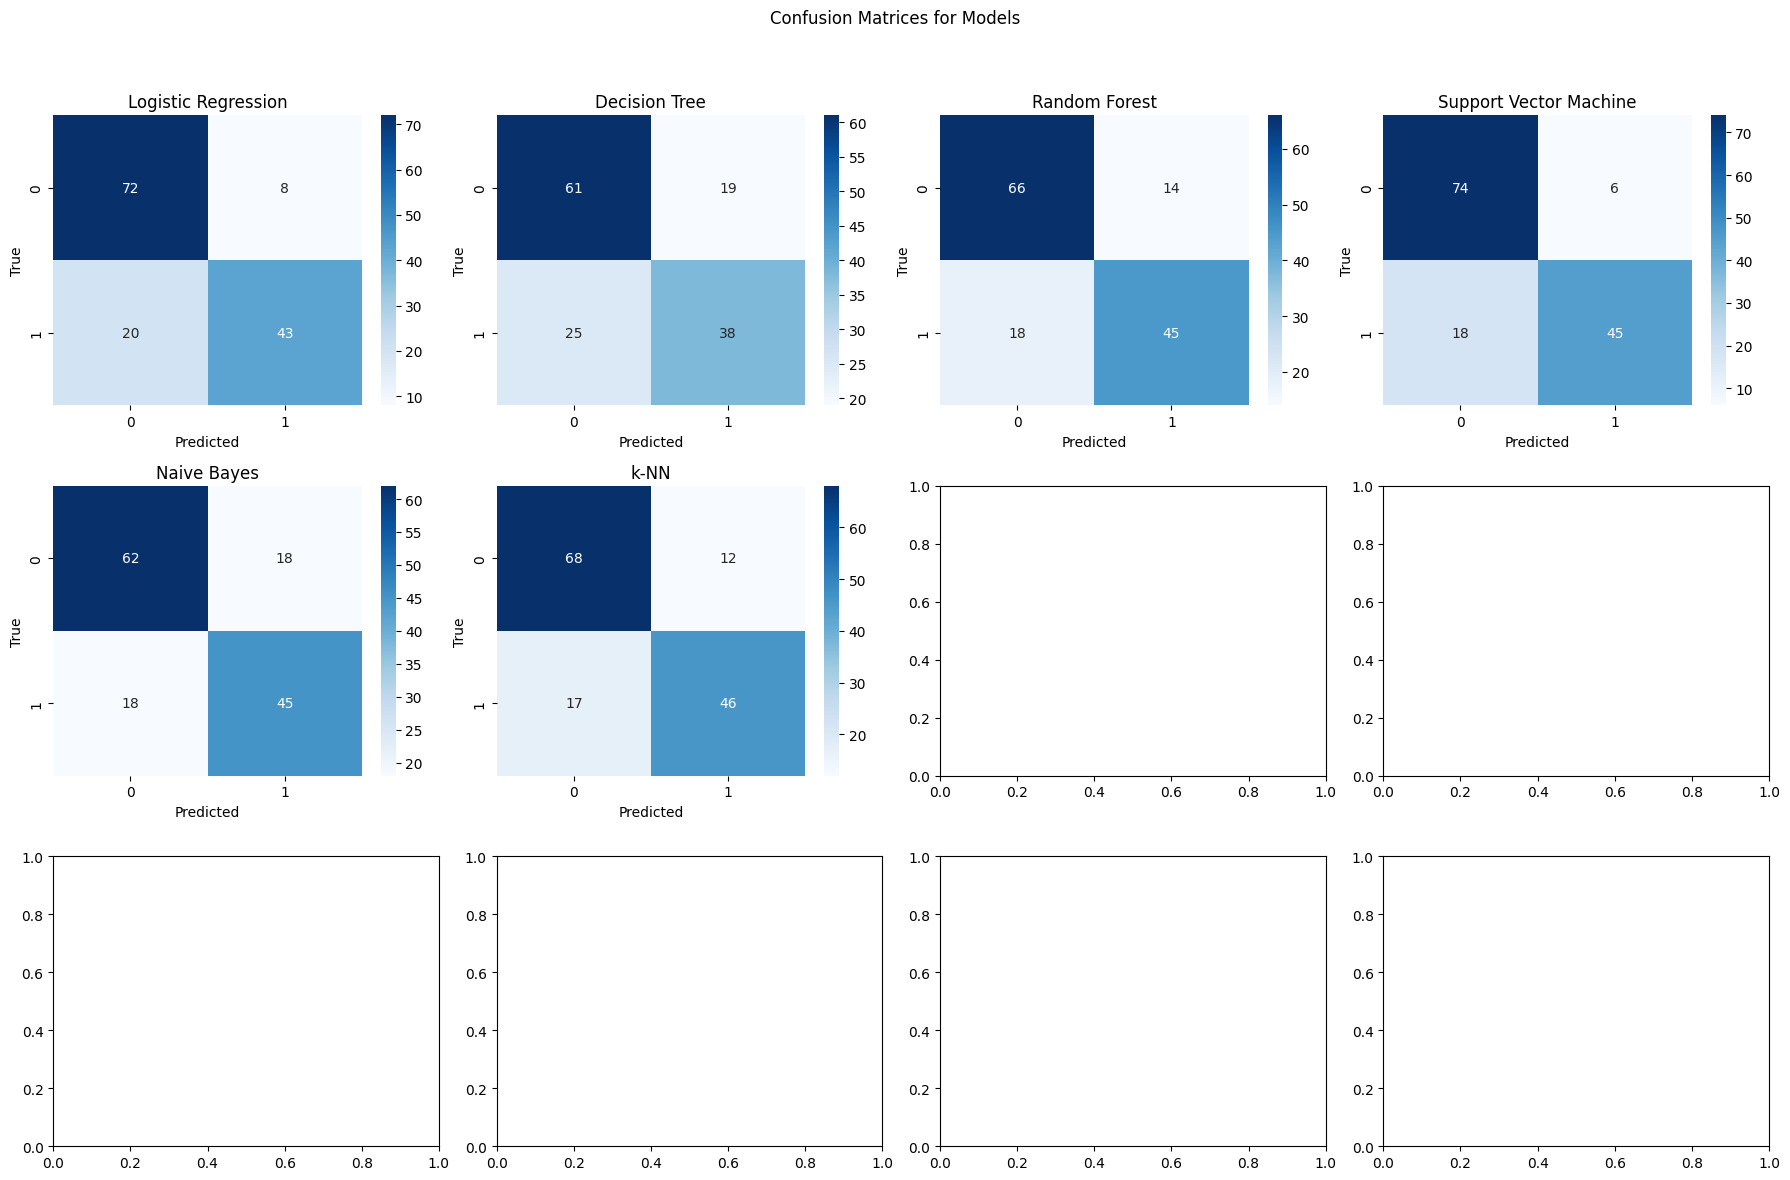

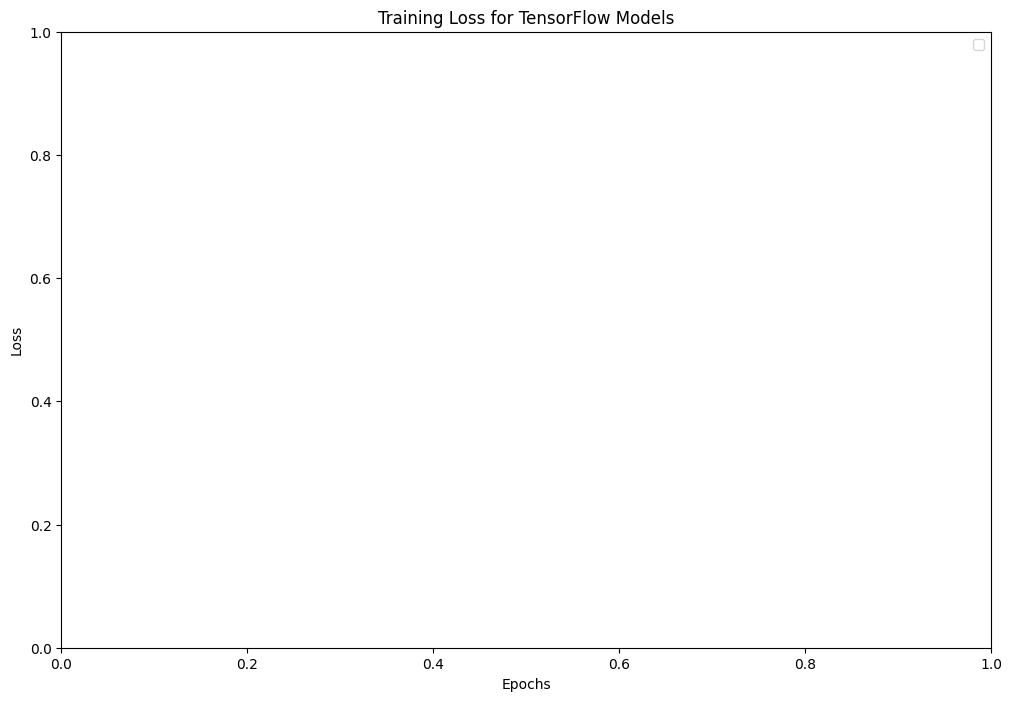

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define TensorFlow model
def create_tensorflow_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    # 'TensorFlow Model': create_tensorflow_model(X_train.shape[1])
}

# Feature selection and preprocessing
features = ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare'] #, 'Embarked'
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to evaluate TensorFlow models and track cost
def evaluate_tensorflow_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.1)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1, y_pred, history.history['loss']

# Train and evaluate models with cross-validation
results = {}
losses = {}  # To store loss values for plotting

for name, model in models.items():
    print(f"\n\nEvaluating {name} with Cross-Validation...")

    if name == 'TensorFlow Model':
        # For TensorFlow models, perform cross-validation manually
        accuracies = []
        f1_scores = []
        losses_list = []

        for train_idx, val_idx in cv.split(X_train):
            X_train_cv, X_val_cv = X_train[train_idx], X_train[val_idx]
            y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            tf_model = create_tensorflow_model(X_train.shape[1])
            accuracy, f1, _, loss = evaluate_tensorflow_model(tf_model, X_train_cv, y_train_cv, X_val_cv, y_val_cv)

            accuracies.append(accuracy)
            f1_scores.append(f1)
            losses_list.append(loss)

        # Average results
        avg_accuracy = np.mean(accuracies)
        avg_f1 = np.mean(f1_scores)
        avg_loss = np.mean(np.concatenate(losses_list))  # Flatten and average losses

        # Store losses for plotting
        losses[name] = avg_loss

    else:
        # Perform cross-validation for scikit-learn models
        accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

        model.fit(X_train, y_train)  # Fit on the whole training set
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        results[name] = {
            'accuracy': np.mean(accuracy_scores),
            'f1_score': np.mean(f1_scores),
            'confusion_matrix': conf_matrix,
            'classification_report': classification_report(y_test, y_pred, output_dict=True)
        }

        print(f"{name} Cross-Validated Accuracy: {np.mean(accuracy_scores):.4f}")
        print(f"{name} Cross-Validated F1 Score: {np.mean(f1_scores):.4f}")

# Plot confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot training losses for TensorFlow models
plt.figure(figsize=(12, 8))
for name, loss in losses.items():
    plt.plot(loss, label=name)

plt.title('Training Loss for TensorFlow Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import random

class CustomizedModel():
    def __init__(self):
        pass

    # Do nothing only necesary for format that call that function in all our models
    def fit(self, X, y):
        pass

    # If the passenger is female survals
    def predict(self, X):
        array = np.zeros(len(X))

        for i in range(len(X)):
            if X[i, 0].astype(int) == 1:
                if X[i, 1] < 3:
                    array[i] = 1
                else:
                    array[i] = random.randint(0, 1) >= 0.5
            else:
                array[i] = 0

        return array


In [ ]:
train_titanic_dropped_age_nan_rows.show()

+-----------+--------+------+---+----+-----+-----+-------+--------+
|PassengerId|Survived|Pclass|Sex| Age|SibSp|Parch|   Fare|Embarked|
+-----------+--------+------+---+----+-----+-----+-------+--------+
|          1|       0|     3|  0|22.0|    1|    0|   7.25|       3|
|          2|       1|     1|  1|38.0|    1|    0|71.2833|       1|
|          3|       1|     3|  1|26.0|    0|    0|  7.925|       3|
|          4|       1|     1|  1|35.0|    1|    0|   53.1|       3|
|          5|       0|     3|  0|35.0|    0|    0|   8.05|       3|
|          7|       0|     1|  0|54.0|    0|    0|51.8625|       3|
|          8|       0|     3|  0| 2.0|    3|    1| 21.075|       3|
|          9|       1|     3|  1|27.0|    0|    2|11.1333|       3|
|         10|       1|     2|  1|14.0|    1|    0|30.0708|       1|
|         11|       1|     3|  1| 4.0|    1|    1|   16.7|       3|
|         12|       1|     1|  1|58.0|    0|    0|  26.55|       3|
|         13|       0|     3|  0|20.0|    0|    

VERY NICE

In [ ]:
# Define training data for our ML models
formatted_dataset = []

for row in range(train_titanic_dropped_age_nan_rows.count()):
    formatted_dataset.append(
        LabeledPoint(
            train_titanic_dropped_age_nan_rows.select('Survived').collect()[row][0],
            [item for item in train_titanic_dropped_age_nan_rows.select('PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked').collect()[row]]))

# train - 80% | test - 20%
train_data = formatted_dataset[:int(len(formatted_dataset) * 0.8)]
test_data = formatted_dataset[int(len(formatted_dataset) * 0.8):]

In [ ]:
print(f"Training data size: {len(train_data)}")
print(f" Testing data size: {len(test_data)}")

Training data size: 569
 Testing data size: 143


**Define and train ML models**

In [ ]:
# Import pyspark ML models
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import SVMWithSGD, LogisticRegressionWithSGD, NaiveBayes
from pyspark.mllib.tree import DecisionTree, RandomForest

# pyspark don't support k-nn ML model

models = {
    'Logistic Regression': LogisticRegressionWithSGD.train(spark.sparkContext.parallelize(train_data), iterations = 10),
    'Decision Tree': DecisionTree.trainClassifier(spark.sparkContext.parallelize(train_data), 8, categoricalFeaturesInfo = {}),
    'Random Forest': RandomForest.trainClassifier(spark.sparkContext.parallelize(train_data), 8, categoricalFeaturesInfo = {}, numTrees = 100),
    'Support Vector Machine': SVMWithSGD.train(spark.sparkContext.parallelize(train_data), iterations = 10),
    'Naive Bayes': NaiveBayes.train(spark.sparkContext.parallelize(train_data)),
    'Customized Model': CustomizedModel()
}

In [ ]:
# Evaluate models
results = {}
for name, model in models.items():
    # Metrics
    predictions = model.predict(spark.sparkContext.parallelize(test_data))
    y_pred = [item for item in predictions.collect()]
    y_test = [item.label for item in test_data]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classification Report for {name}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")

# Plot confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout(rect=[1, 1, 1, 1])
plt.show()


NameError: name 'y_test' is not defined

In [ ]:
def csv_results_given_model(model):
    pass

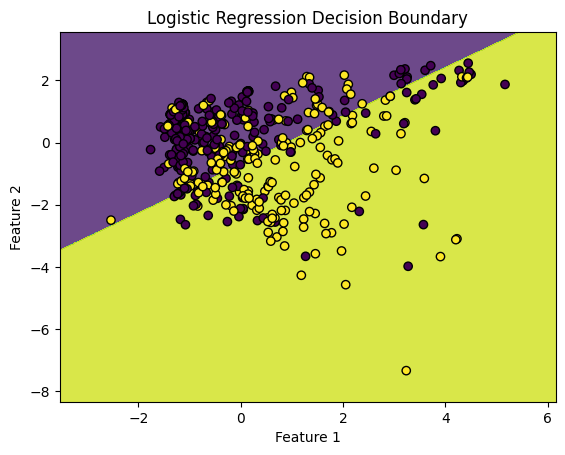

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example with Logistic Regression:
# For this, you might need to reduce your feature space to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_reduced, y_train)

plot_decision_boundary(log_reg, X_reduced, y_train, title="Logistic Regression Decision Boundary")


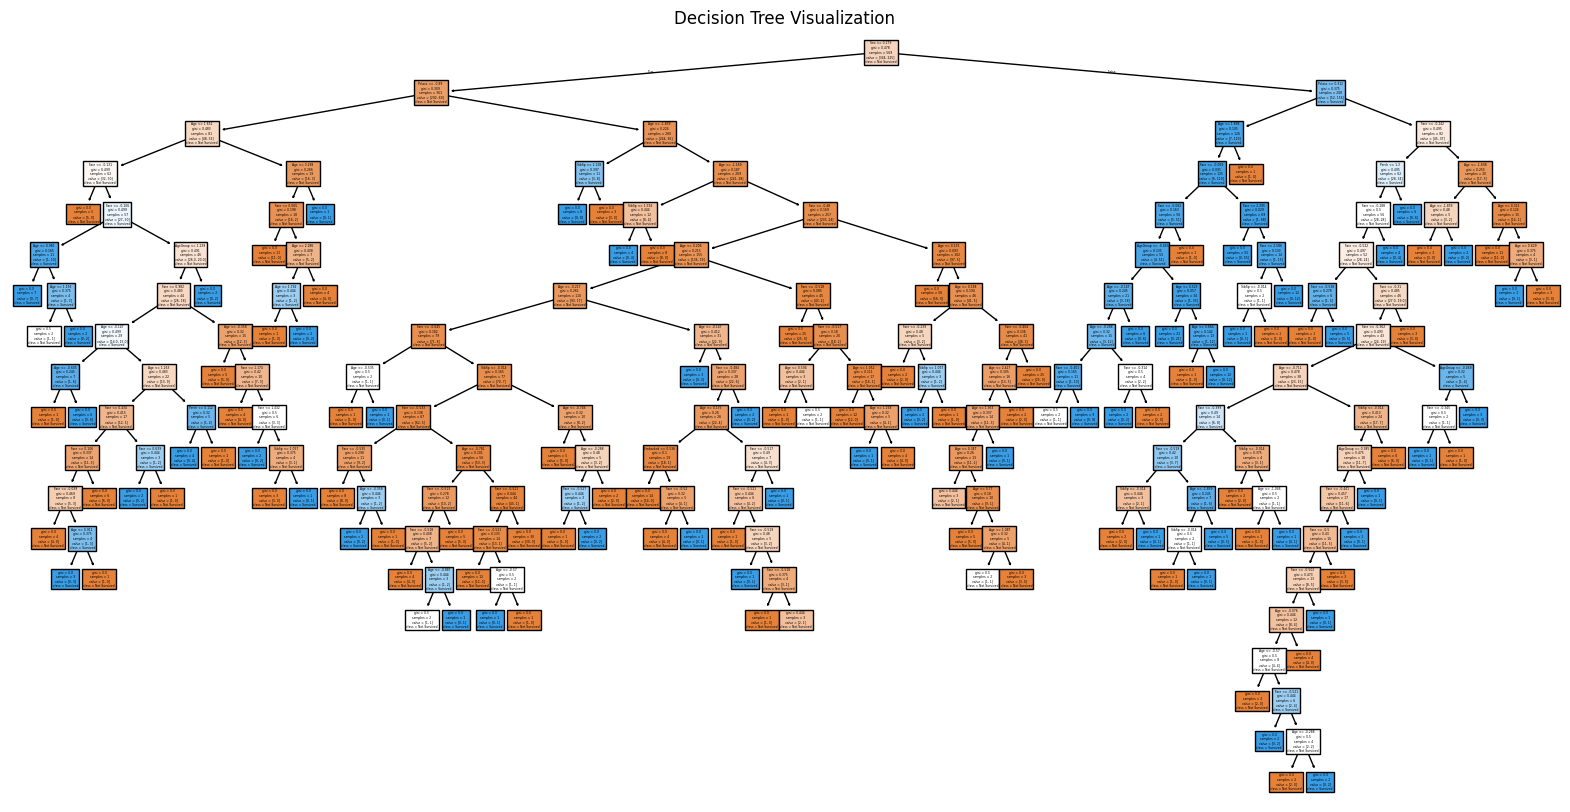

In [ ]:
from sklearn.tree import plot_tree

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf_tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree Visualization")
plt.show()


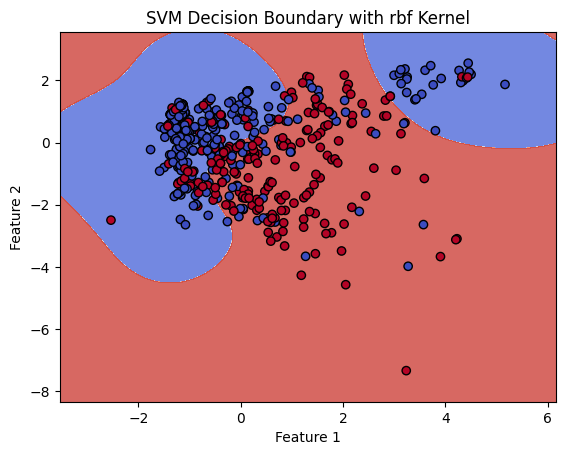

In [ ]:
def plot_svm_decision_boundary(clf, X, y, title="SVM Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example with SVM:
svm = SVC(kernel='rbf')
svm.fit(X_reduced, y_train)

plot_svm_decision_boundary(svm, X_reduced, y_train, title="SVM Decision Boundary with rbf Kernel")


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

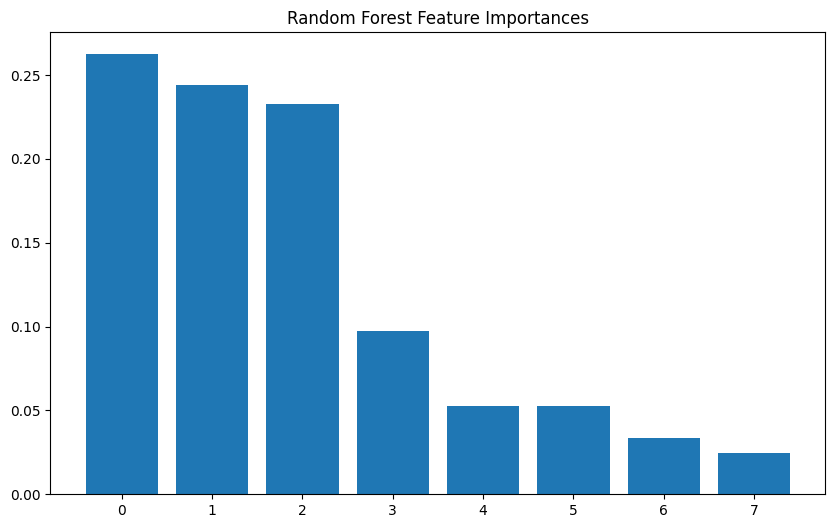

In [ ]:
importances = RandomForestClassifier().fit(X_train, y_train).feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

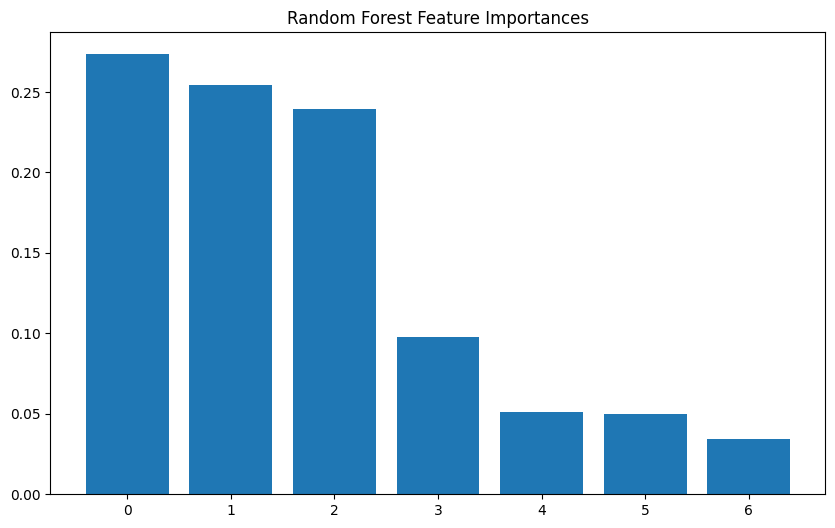

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assume X_train is a DataFrame
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


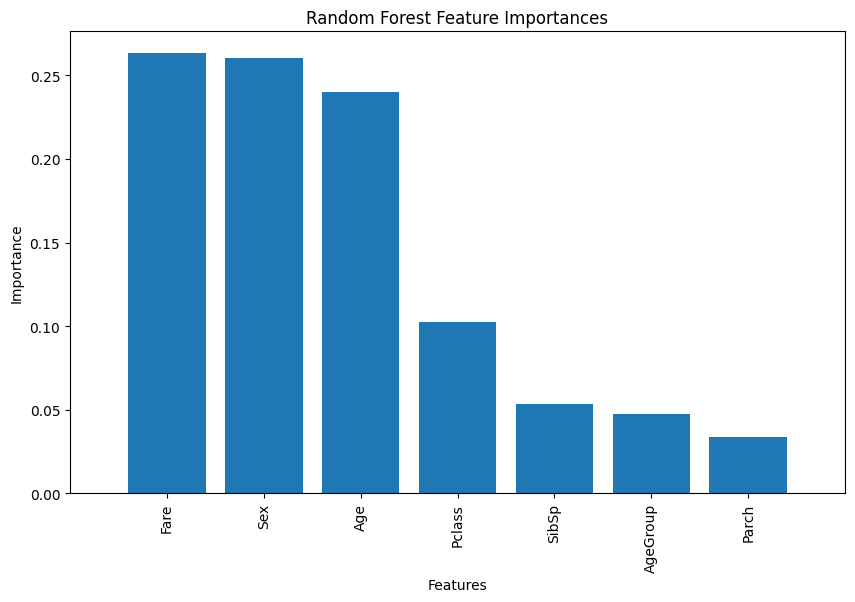

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Define feature names manually
feature_names = ['Sex','Pclass', 'AgeGroup', 'Age','SibSp',	'Parch', 'Fare']  # Replace with actual feature names

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


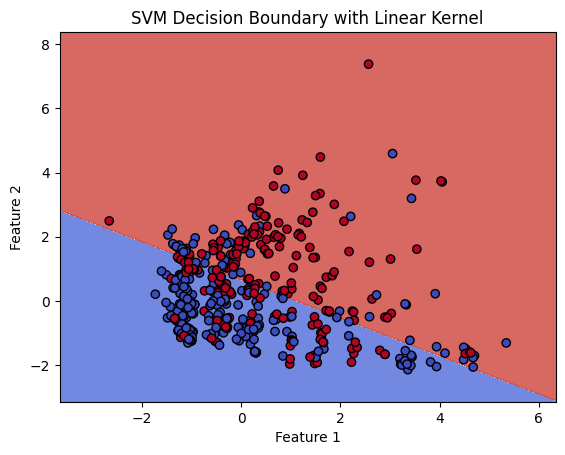

In [ ]:
def plot_svm_decision_boundary(clf, X, y, title="SVM Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example with SVM:
svm = SVC(kernel='linear')
svm.fit(X_reduced, y_train)

plot_svm_decision_boundary(svm, X_reduced, y_train, title="SVM Decision Boundary with Linear Kernel")


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

plt.figure(figsize=(12,6))
for i, feature in enumerate(X_train.columns):
    plt.subplot(1, len(X_train.columns), i + 1)
    for j in range(len(gnb.classes_)):
        mean = gnb.theta_[j, i]
        var = gnb.sigma_[j, i]
        x = np.linspace(X_train[feature].min(), X_train[feature].max(), 100)
        plt.plot(x, (1/np.sqrt(2 * np.pi * var)) * np.exp(- (x - mean) ** 2 / (2 * var)), label=f'Class {gnb.classes_[j]}')
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1200x600 with 0 Axes>

In [ ]:
def plot_knn_decision_boundary(clf, X, y, title="K-NN Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example with K-NN:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_reduced, y_train)

plot_knn_decision_boundary(knn, X_reduced, y_train, title="K-NN Decision Boundary")


NICE with Kernel trick

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM with Linear Kernel': SVC(kernel='linear', probability=True),
    'SVM with Polynomial Kernel': SVC(kernel='poly', degree=3, coef0=1, probability=True),
    'SVM with RBF Kernel': SVC(kernel='rbf', gamma='scale', probability=True),  # Default gamma='scale'
    'SVM with Sigmoid Kernel': SVC(kernel='sigmoid', gamma='scale', coef0=1, probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'Customized Model': CustomizedModel()
}

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classification Report for {name}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")





Training Logistic Regression...
Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        80
           1       0.84      0.68      0.75        63

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.80      0.80       143

Logistic Regression Accuracy: 0.8042
Logistic Regression F1 Score: 0.7544


Training Decision Tree...
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        80
           1       0.67      0.62      0.64        63

    accuracy                           0.70       143
   macro avg       0.70      0.69      0.69       143
weighted avg       0.70      0.70      0.70       143

Decision Tree Accuracy: 0.6993
Decision Tree F1 Score: 0.6446


Training Random Forest...
Classification Report for Random F

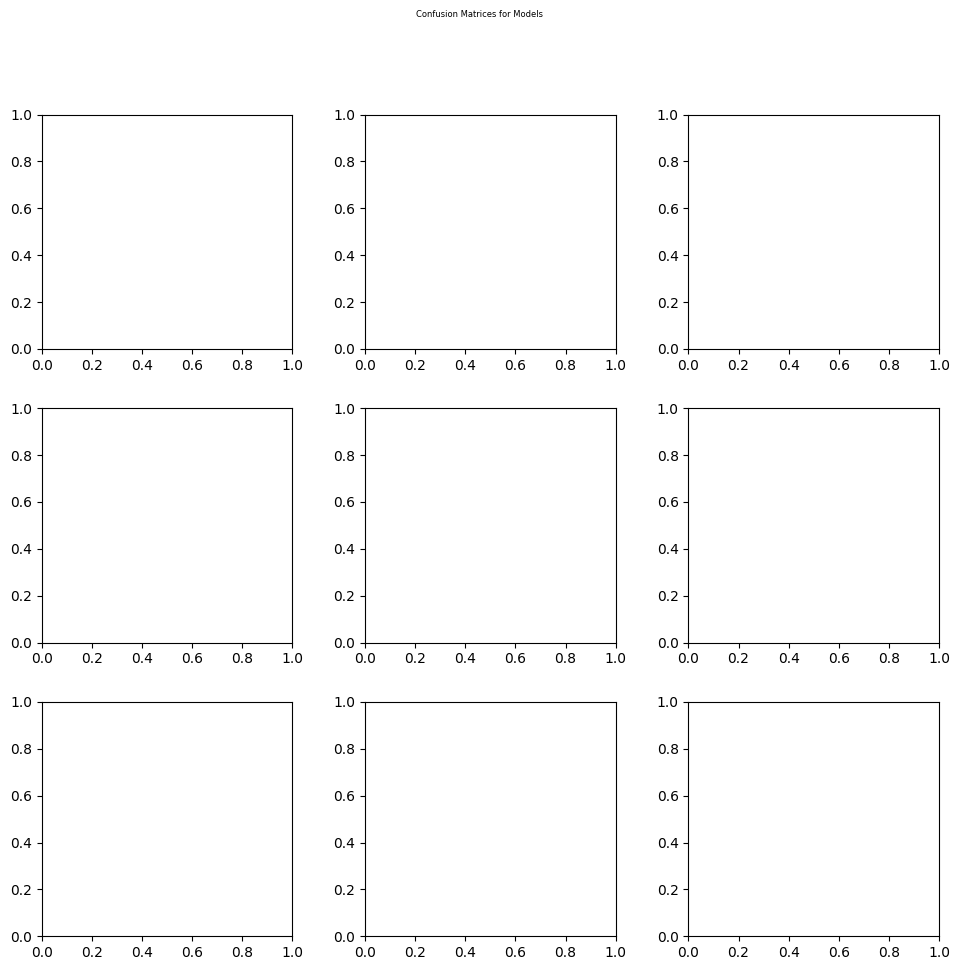

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Confusion Matrices for Models', fontsize=6)


# Set global font sizes
plt.rcParams.update({
    'font.size': 20,  # Default font size
    'axes.titlesize': 8,  # Title size for axes
    'axes.labelsize': 8,  # Label size for axes
    'xtick.labelsize': 10,  # Size for x-axis tick labels
    'ytick.labelsize': 8,  # Size for y-axis tick labels
    'legend.fontsize': 8,  # Size for legend
    'figure.titlesize': 8  # Title size for the figure
})

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name, fontsize=12)
    ax.set_xlabel('Predicted Survived', fontsize=12)
    ax.set_ylabel('True Survived', fontsize=12)
    ax.tick_params(axis='both', labelsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

svm_model = SVC(probability = True)
knn_model = KNeighborsClassifier()


svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)


from sklearn.ensemble import VotingClassifier


#voting based on majority
voting_model = VotingClassifier(estimators = [
    ('svm', svm_model),
    ('knn', knn_model)
], voting = 'soft')  # 'soft' for probability-based voting

voting_model.fit(X_train, y_train)
final_predictions = voting_model.predict(X_test)




#voting based on weight
'''
voting_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('knn', knn_model)
], voting='soft', weights=[2, 1])  # Give SVM double weight

voting_model.fit(X_train, y_train)
final_predictions = voting_model.predict(X_test)
'''



from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
#metrics
accuracy = accuracy_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Combined Model Accuracy:", accuracy)
print("Combined Model F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, final_predictions))


#update results
results['Combined Model'] = {
    'accuracy': accuracy,
    'f1_score': f1,
    'confusion_matrix': conf_matrix,
    'classification_report': classification_report(y_test, final_predictions, output_dict=True)
}


#visual
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust the grid size if needed
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define your models
svm_model = SVC(probability=True)
logistic_model = LogisticRegression(max_iter=1000)

# Load and prepare your data
features = ['Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'AgeGroup']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, passenger_ids_train, passenger_ids_test = train_test_split(
    X, y, train_titanic_dropped_age_nan_rows['PassengerId'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
svm_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test)
logistic_predictions = logistic_model.predict(X_test)

# Combine models using VotingClassifier
voting_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('logistic', logistic_model)
], voting='soft')  # 'soft' for probability-based voting

voting_model.fit(X_train, y_train)
final_predictions = voting_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Combined Model Accuracy:", accuracy)
print("Combined Model F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, final_predictions))

# Update results
results = {}
results['Combined Model'] = {
    'accuracy': accuracy,
    'f1_score': f1,
    'confusion_matrix': conf_matrix,
    'classification_report': classification_report(y_test, final_predictions, output_dict=True)
}

# Visualize confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust the grid size if needed
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:

# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'Customized Model': CustomizedModel()  # Replace with your actual model
}

# Load and prepare your data
# This assumes you have your DataFrame `train_titanic_dropped_age_nan_rows` and `passenger_ids_test`

# Feature selection (no labels)

# WE ADDED EMBARKED, AND IT LOWERS THE SCORE
# quite possibly because at some point it tends to Use Southampton as a parameter of good survival correlation
#but it's not due to just merely have few people boarded it

features = ['Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'AgeGroup']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, passenger_ids_train, passenger_ids_test = train_test_split(
    X, y, train_titanic_dropped_age_nan_rows['PassengerId'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create DataFrame for test set including PassengerId
df_test = X_test.copy()
df_test = pd.DataFrame(df_test, columns=features)  # Convert to DataFrame with feature names
df_test['PassengerId'] = passenger_ids_test.values
df_test['Actual'] = y_test.values

results = {}
false_positives_dict = {}
false_negatives_dict = {}

for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classification Report for {name}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")

    # Capture false positives and false negatives
    df_test['Predicted'] = y_pred
    false_positives = df_test[(df_test['Actual'] == 0) & (df_test['Predicted'] == 1)]
    false_negatives = df_test[(df_test['Actual'] == 1) & (df_test['Predicted'] == 0)]

    false_positives_dict[name] = false_positives['PassengerId'].tolist()
    false_negatives_dict[name] = false_negatives['PassengerId'].tolist()

# Plot confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted Survived')
    ax.set_ylabel('True Survived')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print out the PassengerIds of wrongly classified instances


for name in models.keys():
    print(f"\n{name} - False Positives:")
    print(sorted(false_positives_dict[name]))
    print(f"{name} - False Negatives:")
    print(sorted(false_negatives_dict[name]))


In [ ]:
import numpy as np

def compare_errors(false_positives_dict, false_negatives_dict):
    all_models = list(false_positives_dict.keys())

    comparison_results = {
        'common_false_positives': {},
        'common_false_negatives': {},
        'unique_false_positives': {},
        'unique_false_negatives': {}
    }

    # Compare false positives
    for i, model1 in enumerate(all_models):
        for model2 in all_models[i + 1:]:
            common_fp = set(false_positives_dict[model1]).intersection(set(false_positives_dict[model2]))
            unique_fp_model1 = set(false_positives_dict[model1]).difference(set(false_positives_dict[model2]))
            unique_fp_model2 = set(false_positives_dict[model2]).difference(set(false_positives_dict[model1]))

            comparison_results['common_false_positives'][(model1, model2)] = common_fp
            comparison_results['unique_false_positives'][(model1, model2)] = (unique_fp_model1, unique_fp_model2)

    # Compare false negatives
    for i, model1 in enumerate(all_models):
        for model2 in all_models[i + 1:]:
            common_fn = set(false_negatives_dict[model1]).intersection(set(false_negatives_dict[model2]))
            unique_fn_model1 = set(false_negatives_dict[model1]).difference(set(false_negatives_dict[model2]))
            unique_fn_model2 = set(false_negatives_dict[model2]).difference(set(false_negatives_dict[model1]))

            comparison_results['common_false_negatives'][(model1, model2)] = common_fn
            comparison_results['unique_false_negatives'][(model1, model2)] = (unique_fn_model1, unique_fn_model2)

    return comparison_results


In [ ]:

# WITH NAN AGE
#it was impossible to use NaN Age, the models cant support that
'''


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'Customized Model': CustomizedModel()  # Replace with your actual model
}

# Load and prepare your data
# This assumes you have your DataFrame `train_titanic_dropped_age_nan_rows` and `passenger_ids_test`

# Feature selection (no labels)
features = ['Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
X = train_titanic_dropped[features]
y = train_titanic_dropped['Survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, passenger_ids_train, passenger_ids_test = train_test_split(
    X, y, train_titanic_dropped['PassengerId'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create DataFrame for test set including PassengerId
df_test = X_test.copy()
df_test = pd.DataFrame(df_test, columns=features)  # Convert to DataFrame with feature names
df_test['PassengerId'] = passenger_ids_test.values
df_test['Actual'] = y_test.values

results = {}
false_positives_dict = {}
false_negatives_dict = {}

for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classification Report for {name}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")

    # Capture false positives and false negatives
    df_test['Predicted'] = y_pred
    false_positives = df_test[(df_test['Actual'] == 0) & (df_test['Predicted'] == 1)]
    false_negatives = df_test[(df_test['Actual'] == 1) & (df_test['Predicted'] == 0)]

    false_positives_dict[name] = false_positives['PassengerId'].tolist()
    false_negatives_dict[name] = false_negatives['PassengerId'].tolist()

# Plot confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted Survived')
    ax.set_ylabel('True Survived')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print out the PassengerIds of wrongly classified instances
for name in models.keys():
    print(f"\n{name} - False Positives:")
    print(false_positives_dict[name])
    print(f"{name} - False Negatives:")
    print(false_negatives_dict[name])
'''

In [ ]:
# Compare errors among models
comparison_results = compare_errors(false_positives_dict, false_negatives_dict)

# Print the results
for (model1, model2), common_fp in comparison_results['common_false_positives'].items():
    print(f"\nCommon False Positives between {model1} and {model2}:")
    print(common_fp)

for (model1, model2), (unique_fp_model1, unique_fp_model2) in comparison_results['unique_false_positives'].items():
    print(f"\nUnique False Positives for {model1} (not in {model2}):")
    print(unique_fp_model1)
    print(f"Unique False Positives for {model2} (not in {model1}):")
    print(unique_fp_model2)

for (model1, model2), common_fn in comparison_results['common_false_negatives'].items():
    print(f"\nCommon False Negatives between {model1} and {model2}:")
    print(common_fn)

for (model1, model2), (unique_fn_model1, unique_fn_model2) in comparison_results['unique_false_negatives'].items():
    print(f"\nUnique False Negatives for {model1} (not in {model2}):")
    print(unique_fn_model1)
    print(f"Unique False Negatives for {model2} (not in {model1}):")
    print(unique_fn_model2)


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'Customized Model': CustomizedModel()  # Replace with your actual model
}

# Load and prepare your data
features = ['Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'AgeGroup']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, passenger_ids_train, passenger_ids_test = train_test_split(
    X, y, train_titanic_dropped_age_nan_rows['PassengerId'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create DataFrame for test set including PassengerId
df_test = pd.DataFrame(X_test, columns=features)  # Convert to DataFrame with feature names
df_test['PassengerId'] = passenger_ids_test.values
df_test['Actual'] = y_test.values

results = {}
false_positives_dict = {}
false_negatives_dict = {}
false_positives_list = []
false_negatives_list = []

for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classification Report for {name}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")

    # Capture false positives and false negatives
    df_test['Predicted'] = y_pred
    false_positives = df_test[(df_test['Actual'] == 0) & (df_test['Predicted'] == 1)]
    false_negatives = df_test[(df_test['Actual'] == 1) & (df_test['Predicted'] == 0)]

    false_positives_dict[name] = false_positives['PassengerId'].tolist()
    false_negatives_dict[name] = false_negatives['PassengerId'].tolist()

    # Append to the list
    for _, row in false_positives.iterrows():
        false_positives_list.append({
            'Model': name,
            'Type': 'False Positive',
            'PassengerId': row['PassengerId'],
            **row[features].to_dict()  # Add feature columns
        })

    for _, row in false_negatives.iterrows():
        false_negatives_list.append({
            'Model': name,
            'Type': 'False Negative',
            'PassengerId': row['PassengerId'],
            **row[features].to_dict()  # Add feature columns
        })

# Combine lists into a DataFrame
false_predictions_df = pd.DataFrame(false_positives_list + false_negatives_list)

# Plot confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    cm = result['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print out the PassengerIds of wrongly classified instances
for name in models.keys():
    print(f"\n{name} - False Positives:")
    print(sorted(false_positives_dict[name]))
    print(f"{name} - False Negatives:")
    print(sorted(false_negatives_dict[name]))

# Display the DataFrame with false positives and false negatives
print("\nFalse Positives and False Negatives DataFrame:")
print(false_predictions_df.head())


In [ ]:
false_predictions_df

In [ ]:
# Export to CSV
csv_file_path = 'sample_data/false_predictions.csv'  # Define your path here
false_predictions_df.to_csv(csv_file_path, index=False)


In [ ]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('svm', SVC(probability=True)),
    ('logistic', LogisticRegression(max_iter=1000))
]

# Define the meta-model
meta_model = LogisticRegression(max_iter=1000)

# Create the StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Cross-validation for the meta-model
)

# Train and evaluate the stacking model
stacking_model.fit(X_train, y_train)
final_predictions = stacking_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Stacking Model Accuracy:", accuracy)
print("Stacking Model F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, final_predictions))

# Update results
results['Stacking Model'] = {
    'accuracy': accuracy,
    'f1_score': f1,
    'confusion_matrix': conf_matrix,
    'classification_report': classification_report(y_test, final_predictions, output_dict=True)
}


Stacking Model Accuracy: 0.8251748251748252
Stacking Model F1 Score: 0.7826086956521738
Confusion Matrix:
[[73  7]
 [18 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        80
           1       0.87      0.71      0.78        63

    accuracy                           0.83       143
   macro avg       0.83      0.81      0.82       143
weighted avg       0.83      0.83      0.82       143



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train_base, X_val_base, y_train_base, y_val_base = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train base models
svm_model.fit(X_train_base, y_train_base)
logistic_model.fit(X_train_base, y_train_base)

# Generate base predictions
svm_val_preds = svm_model.predict_proba(X_val_base)[:, 1]
logistic_val_preds = logistic_model.predict_proba(X_val_base)[:, 1]

# Stack predictions for the meta-model
X_meta = np.column_stack((svm_val_preds, logistic_val_preds))

# Train the meta-model
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(X_meta, y_val_base)

# Generate test set predictions
svm_test_preds = svm_model.predict_proba(X_test)[:, 1]
logistic_test_preds = logistic_model.predict_proba(X_test)[:, 1]
X_meta_test = np.column_stack((svm_test_preds, logistic_test_preds))

# Predict using the meta-model
final_predictions = meta_model.predict(X_meta_test)

# Metrics
accuracy = accuracy_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Blending Model Accuracy:", accuracy)
print("Blending Model F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, final_predictions))

# Update results
results['Blending Model'] = {
    'accuracy': accuracy,
    'f1_score': f1,
    'confusion_matrix': conf_matrix,
    'classification_report': classification_report(y_test, final_predictions, output_dict=True)
}


Blending Model Accuracy: 0.8251748251748252
Blending Model F1 Score: 0.7826086956521738
Confusion Matrix:
[[73  7]
 [18 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        80
           1       0.87      0.71      0.78        63

    accuracy                           0.83       143
   macro avg       0.83      0.81      0.82       143
weighted avg       0.83      0.83      0.82       143



In [ ]:
# Train the first model
svm_model.fit(X_train, y_train)

# Generate predictions from the first model
svm_train_preds = svm_model.predict_proba(X_train)[:, 1]
svm_test_preds = svm_model.predict_proba(X_test)[:, 1]

# Augment the training and test datasets
X_train_aug = np.column_stack((X_train, svm_train_preds))
X_test_aug = np.column_stack((X_test, svm_test_preds))

# Train the second model on the augmented dataset
logistic_model.fit(X_train_aug, y_train)
final_predictions = logistic_model.predict(X_test_aug)

# Metrics
accuracy = accuracy_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Feature Augmentation Model Accuracy:", accuracy)
print("Feature Augmentation Model F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, final_predictions))

# Update results
results['Feature Augmentation Model'] = {
    'accuracy': accuracy,
    'f1_score': f1,
    'confusion_matrix': conf_matrix,
    'classification_report': classification_report(y_test, final_predictions, output_dict=True)
}
